In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th
import os

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
trial_name = "final"
array_type = "reversed"

In [3]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob(f"{trial_name}_trial/{array_type}_array/cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 62/62 [00:02<00:00, 24.80it/s]


View Calltree

In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

11.753 main
├─ 0.144 MPI_Barrier
├─ 0.001 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
└─ 11.223 whole_function
   ├─ 0.258 array_creation
   ├─ 10.916 master_function
   │  ├─ 0.001 MPI_Barrier
   │  ├─ 0.000 MPI_Bcast
   │  ├─ 3.325 MPI_Gather
   │  ├─ 3.566 MPI_Gatherv
   │  └─ 2.032 MPI_Scatterv
   ├─ 0.192 sort_validation
   └─ 11.175 worker_function
      ├─ 2.248 MPI_Barrier
      ├─ 0.449 MPI_Bcast
      ├─ 0.145 MPI_Gather
      ├─ 3.533 MPI_Gatherv
      └─ 1.924 MPI_Scatterv

Legend (Metric: Avg time/rank Min: 0.00 Max: 11.75 indices: {'profile': 66953005})
█ 10.58 - 11.75
█ 8.23 - 10.58
█ 5.88 - 8.23
█ 3.53 - 5.88
█ 1.18 - 3.53
█ 0.00 - 1.18

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `array_size` in the Thicket metadata table.

In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("array_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "array_size"]).sort_index()

tk.dataframe.head()

profile  nid  \
node                                 num_procs array_size                    
{'name': 'main', 'type': 'function'} 2         65536       2918980942  1.0   
                                               262144      2604656405  1.0   
                                               1048576     2552833201  1.0   
                                               4194304     2072576368  1.0   
                                               16777216    3538450445  1.0   

                                                            spot.channel  \
node                                 num_procs array_size                  
{'name': 'main', 'type': 'function'} 2         65536       regionprofile   
                                               262144      regionprofile   
                                               1048576     regionprofile   
                                               4194304     regionprofile   
                                               16777216    regionprofile   

                                                           Min time/rank  \
node                                 num_procs array_size                  
{'name': 'main', 'type': 'function'} 2         65536            0.307801   
                                               262144           0.594115   
                                               1048576          0.818251   
                                               4194304          1.414782   
                                               16777216         4.940141   

                                                           Max time/rank  \
node                                 num_procs array_size                  
{'name': 'main', 'type': 'function'} 2         65536            0.307971   
                                               262144           0.597126   
                                               1048576          0.818273   
                                               4194304          1.415286   
                                               16777216         4.940662   

                                                           Avg time/rank  \
node                                 num_procs array_size                  
{'name': 'main', 'type': 'function'} 2         65536            0.307886   
                                               262144           0.595620   
                                               1048576          0.818262   
                                               4194304          1.415034   
                                               16777216         4.940401   

                                                           Total time  \
node                                 num_procs array_size               
{'name': 'main', 'type': 'function'} 2         65536         0.615772   
                                               262144        1.191241   
                                               1048576       1.636524   
                                               4194304       2.830068   
                                               16777216      9.880803   

                                                           Variance time/rank  \
node                                 num_procs array_size                       
{'name': 'main', 'type': 'function'} 2         65536                 0.000000   
                                               262144                0.000002   
                                               1048576               0.000000   
                                               4194304               0.000000   
                                               16777216              0.000000   

                                                           Min time/rank (exc)  \
node                                 num_procs array_size                        
{'name': 'main', 'type': 'function'} 2         65536                  0.291359   
                                               262144    

In [6]:
# Define common variables
array_sizes = [65536, 524288, 4194304]
if trial_name == "my":
    processes = [2, 4, 8, 16, 32, 64]
elif trial_name == "final":
    array_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
    processes = [2, 4, 8, 16, 32, 64, 128, 256, 512]
else:
    processes = [2, 4, 8, 16]


In [7]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [13]:
def plot_pandas(df, title, xlabel, ylabel, saved="output"):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7),
#         logy=True
    )        
#     plot.set_xscale('log', base=2)
#     plot.set_yscale('log', base=2)
    plt.savefig(saved)
    plt.show()
    return plot

Total time graphs

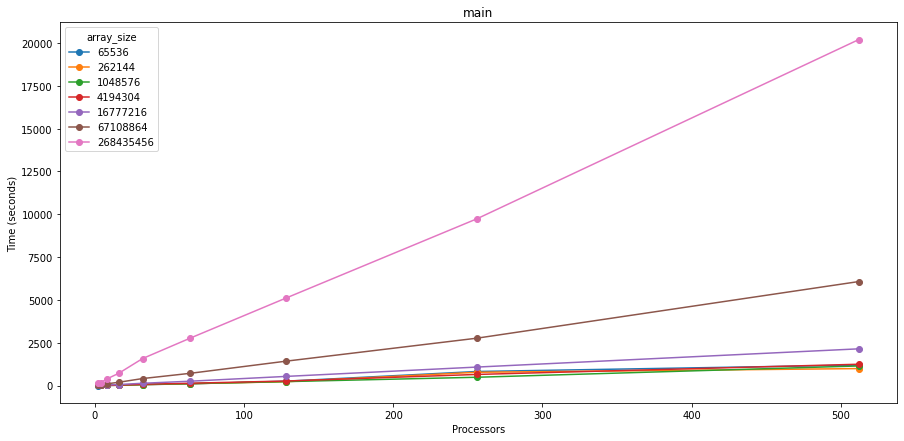

<Figure size 432x288 with 0 Axes>

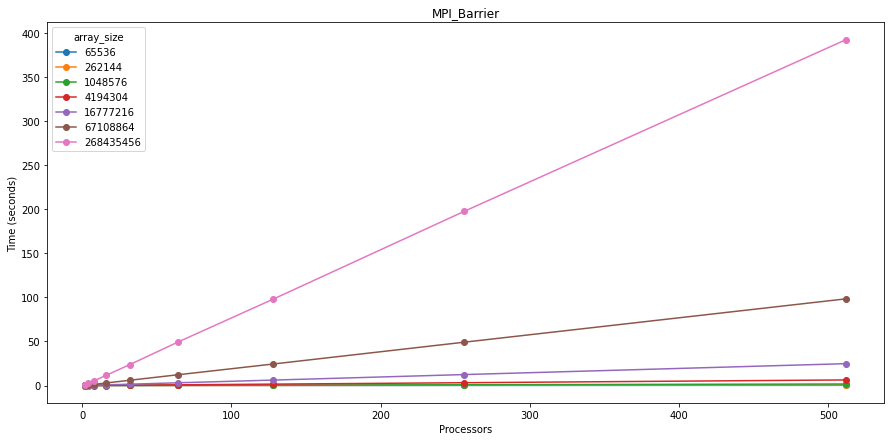

<Figure size 432x288 with 0 Axes>

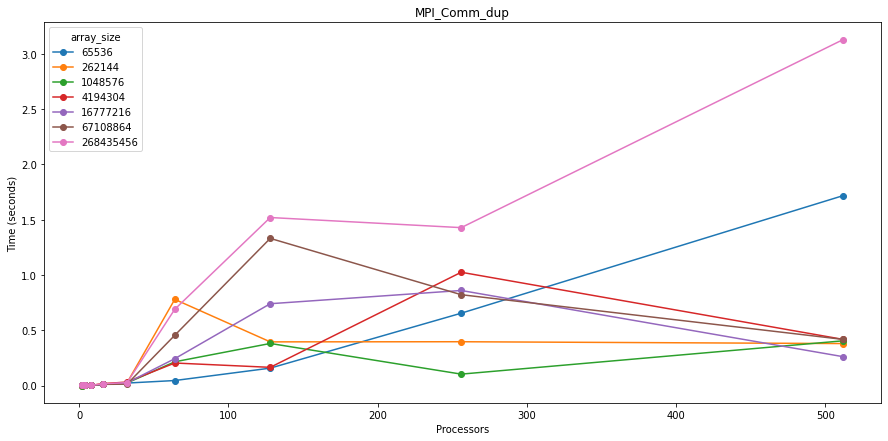

<Figure size 432x288 with 0 Axes>

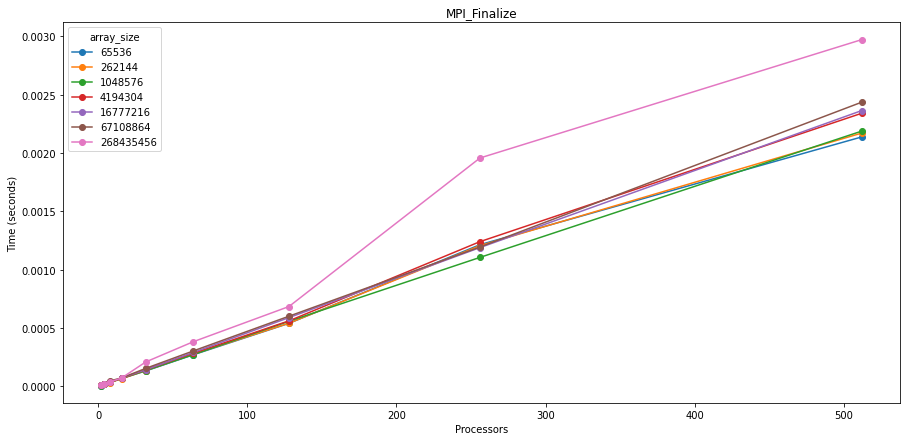

<Figure size 432x288 with 0 Axes>

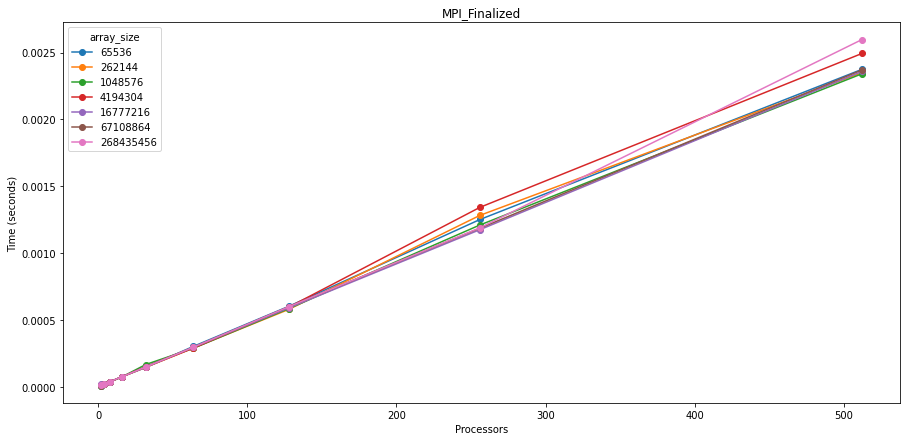

<Figure size 432x288 with 0 Axes>

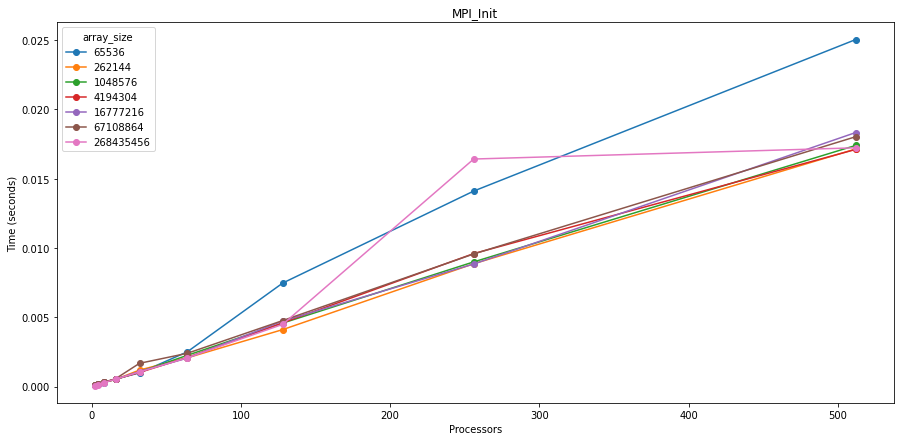

<Figure size 432x288 with 0 Axes>

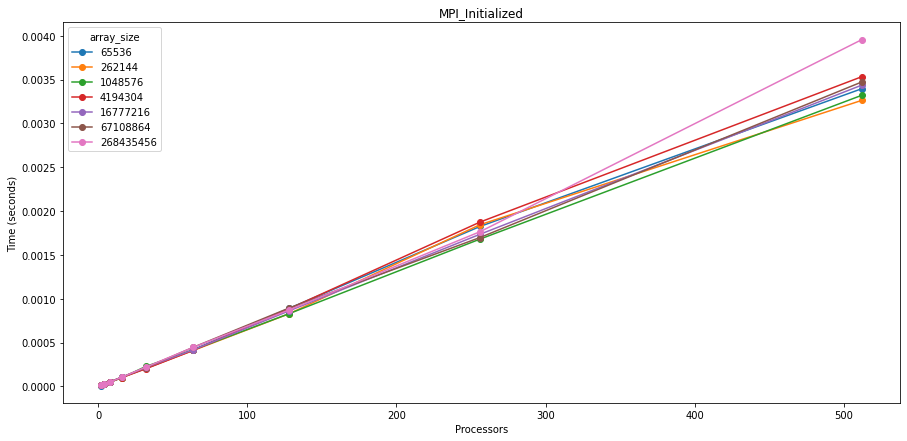

<Figure size 432x288 with 0 Axes>

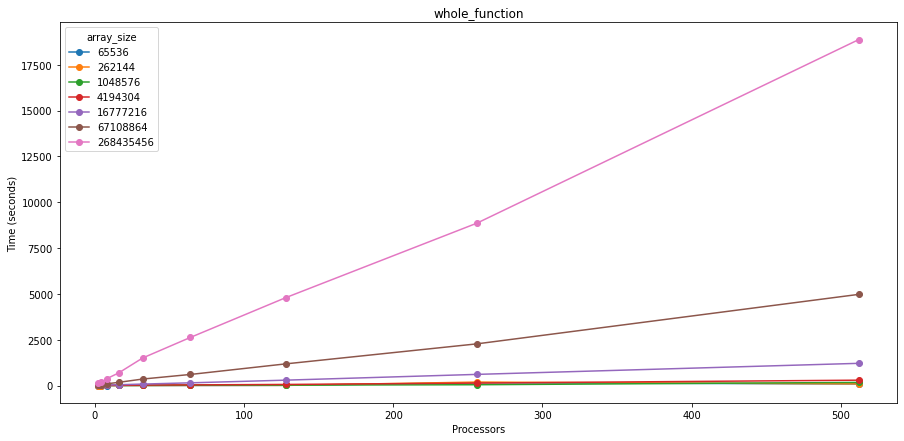

<Figure size 432x288 with 0 Axes>

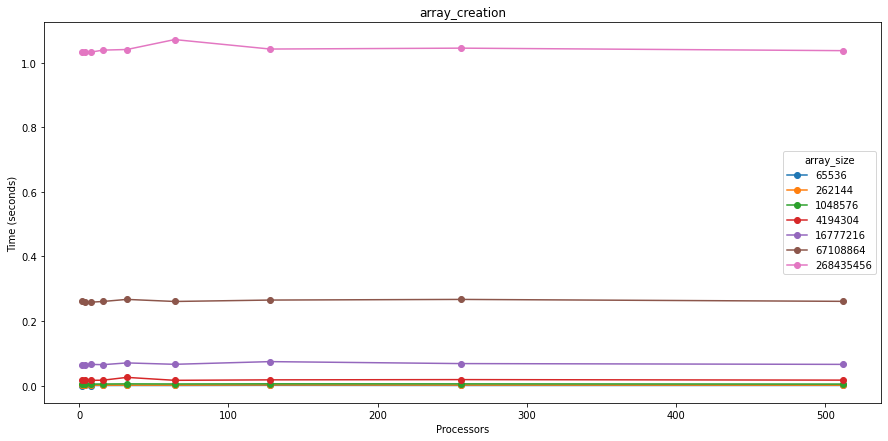

<Figure size 432x288 with 0 Axes>

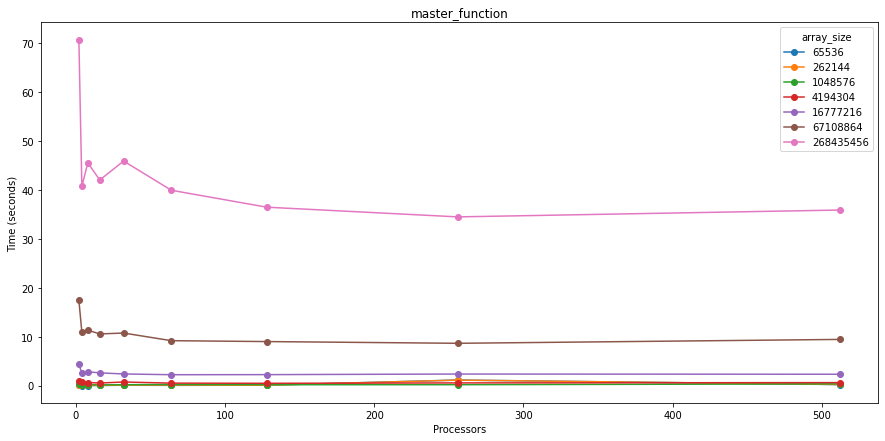

<Figure size 432x288 with 0 Axes>

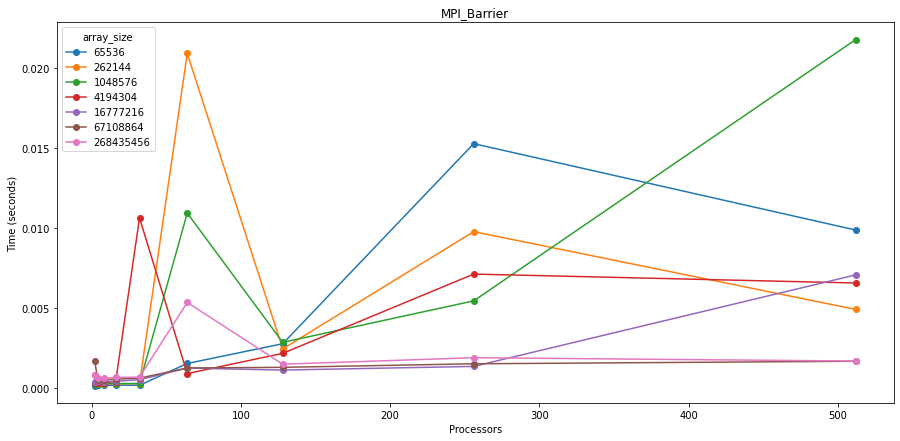

<Figure size 432x288 with 0 Axes>

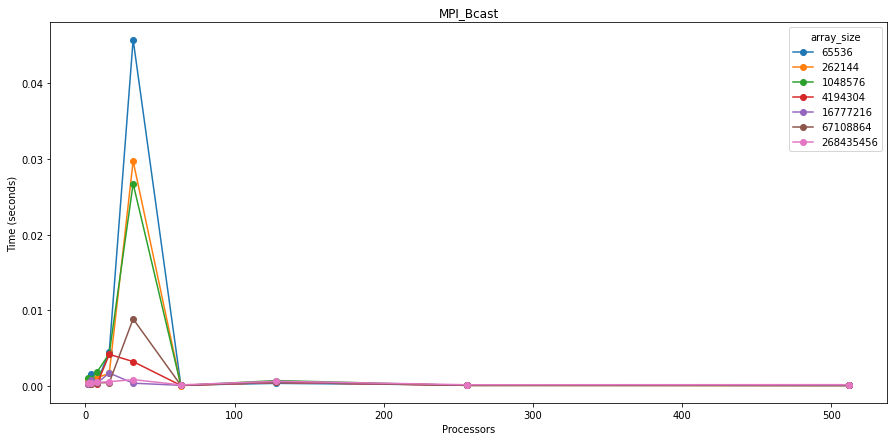

<Figure size 432x288 with 0 Axes>

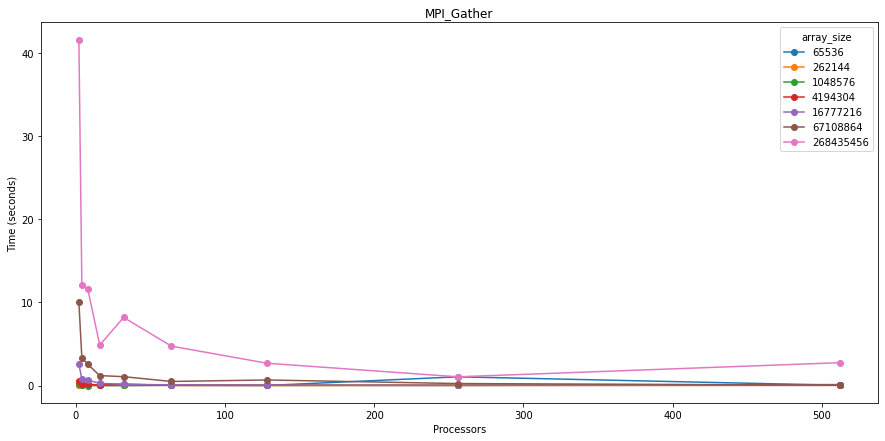

<Figure size 432x288 with 0 Axes>

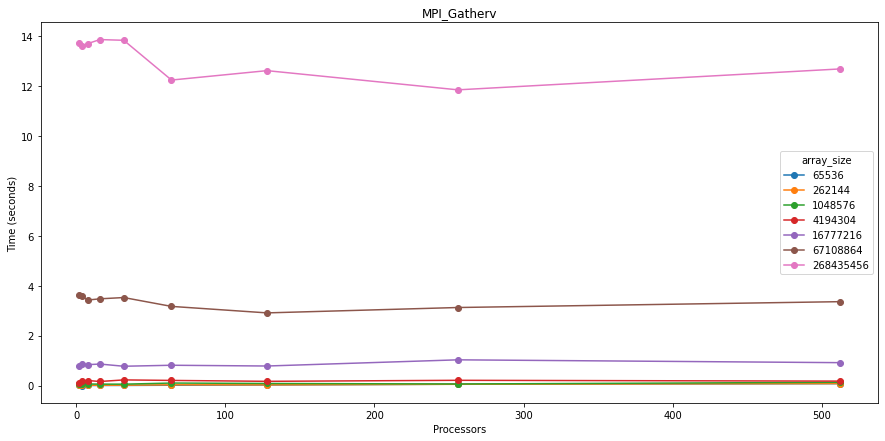

<Figure size 432x288 with 0 Axes>

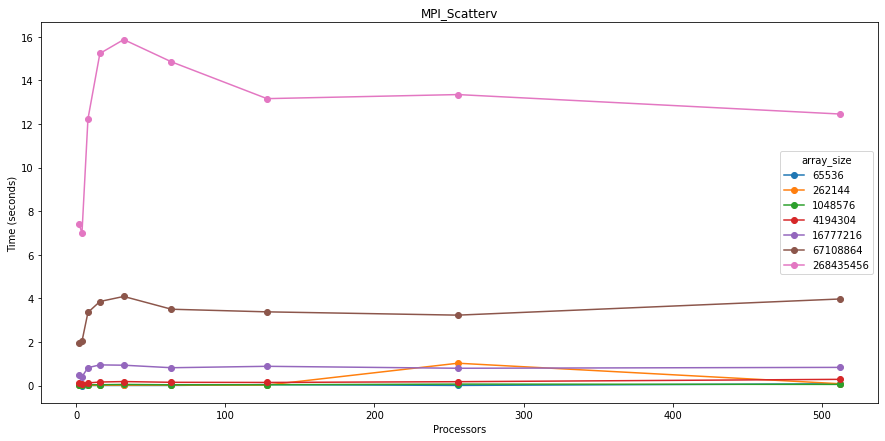

<Figure size 432x288 with 0 Axes>

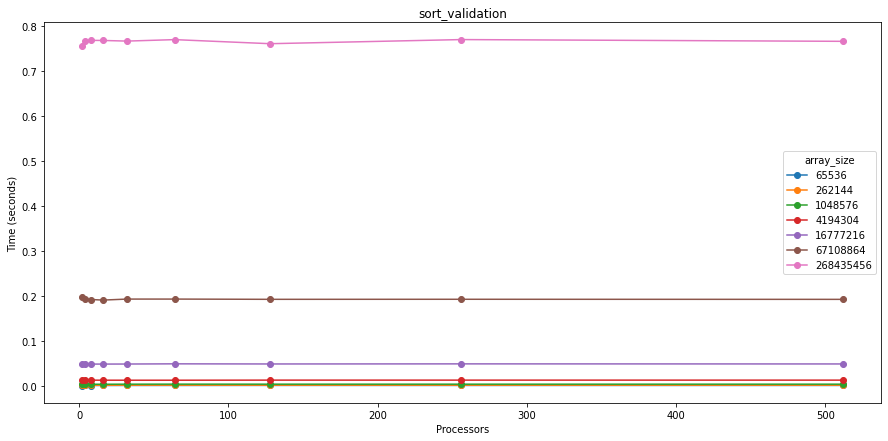

<Figure size 432x288 with 0 Axes>

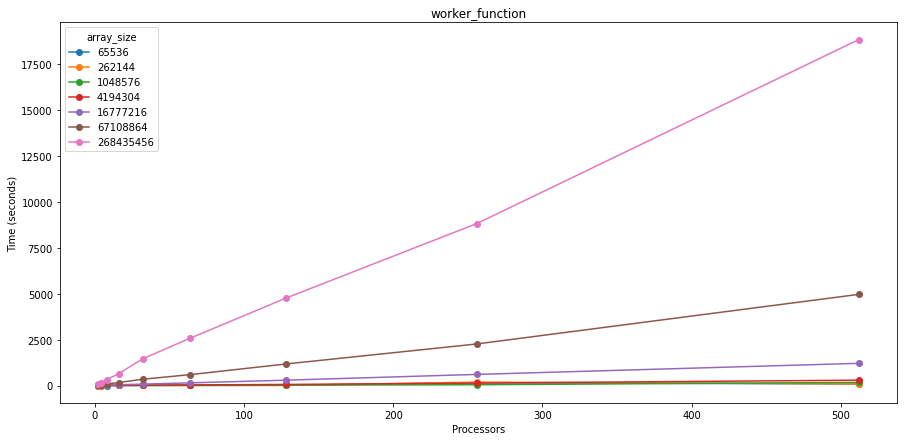

<Figure size 432x288 with 0 Axes>

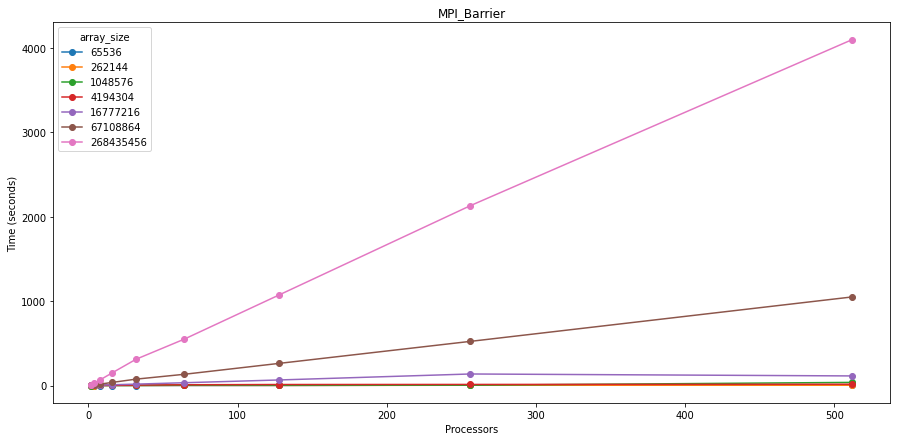

<Figure size 432x288 with 0 Axes>

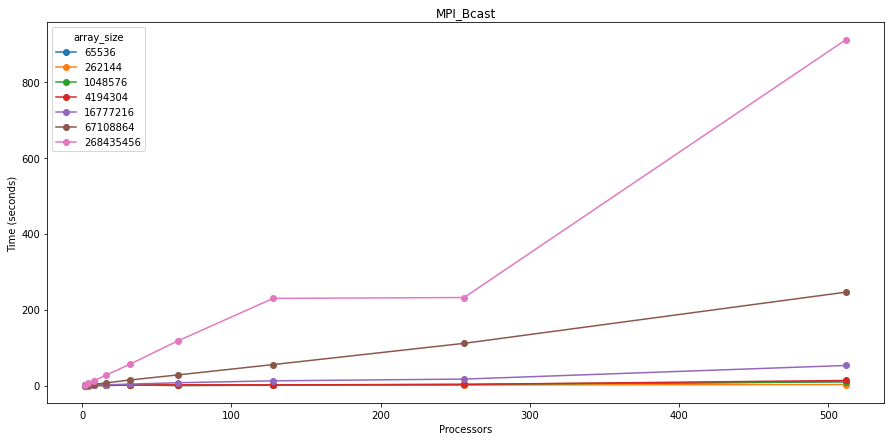

<Figure size 432x288 with 0 Axes>

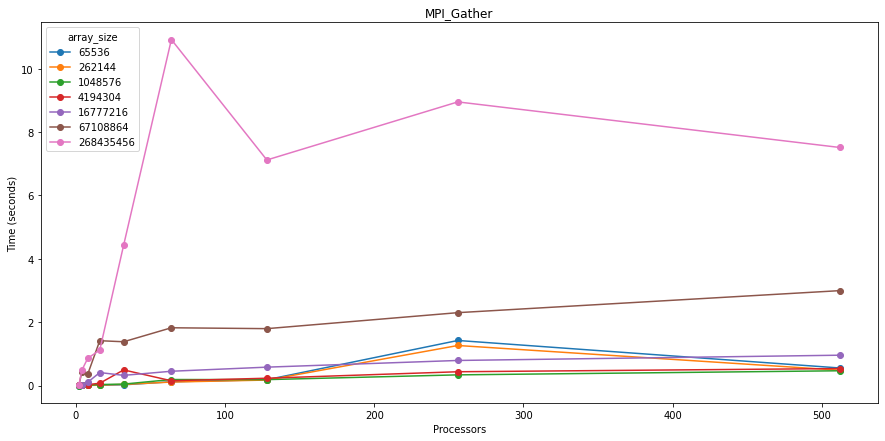

<Figure size 432x288 with 0 Axes>

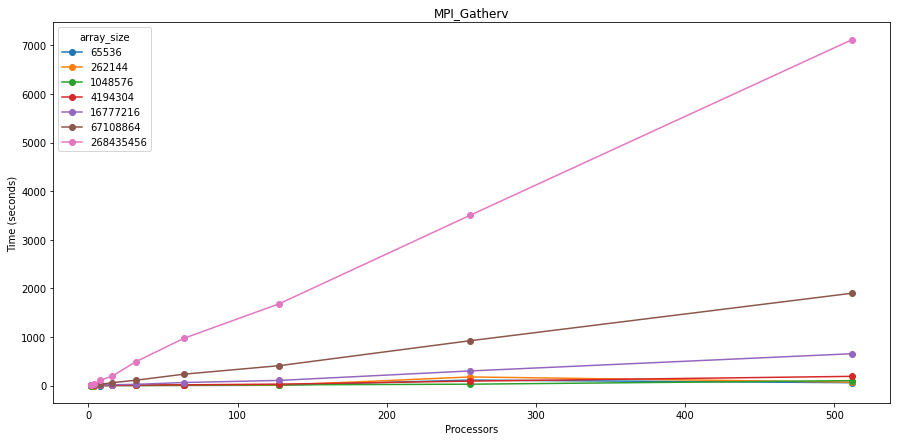

<Figure size 432x288 with 0 Axes>

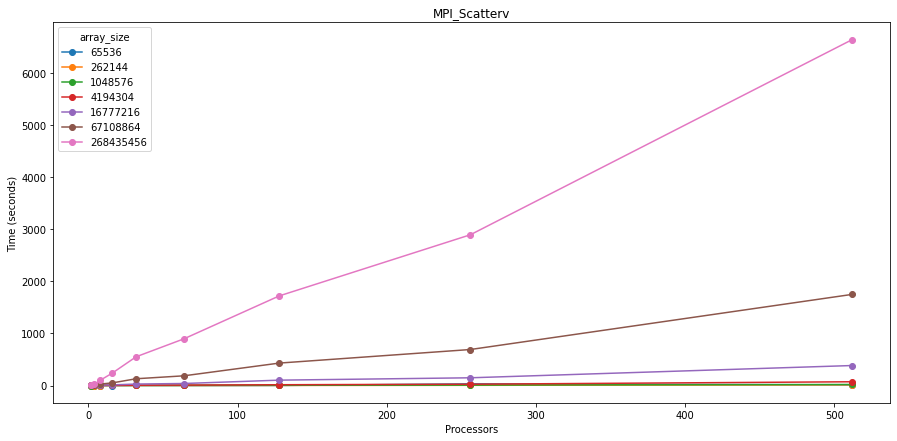

<Figure size 432x288 with 0 Axes>

In [15]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Total time"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
        saved= f"./{trial_name}_trial/{array_type}_array/plot/total/"+node.frame["name"]
    )

Max time graphs

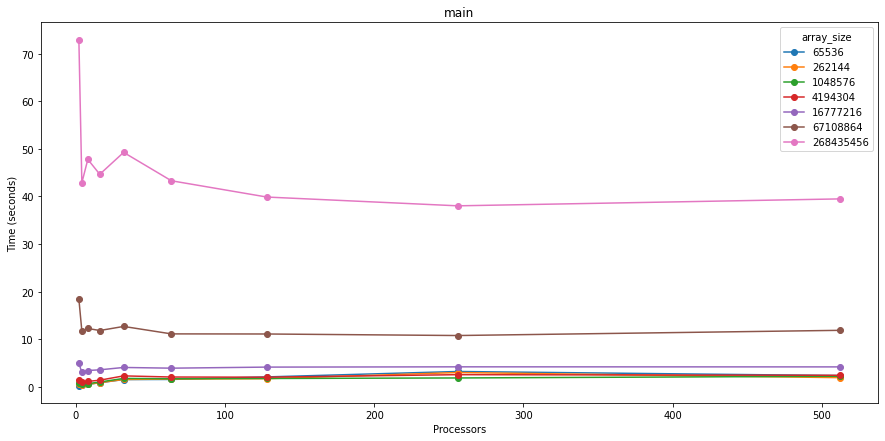

<Figure size 432x288 with 0 Axes>

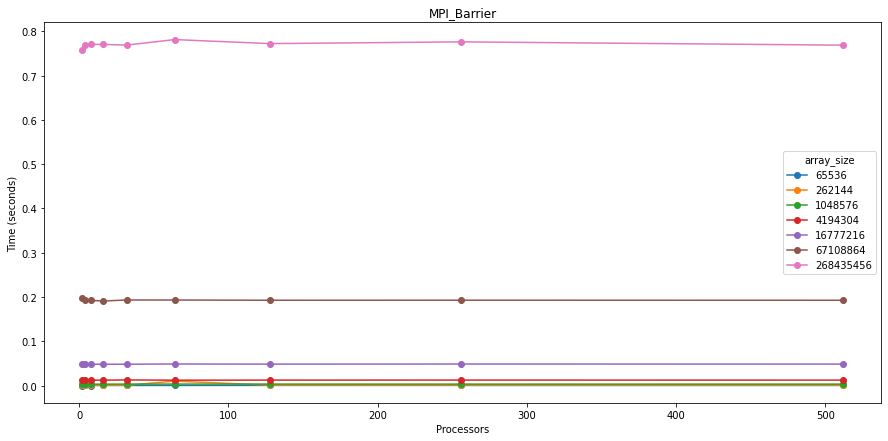

<Figure size 432x288 with 0 Axes>

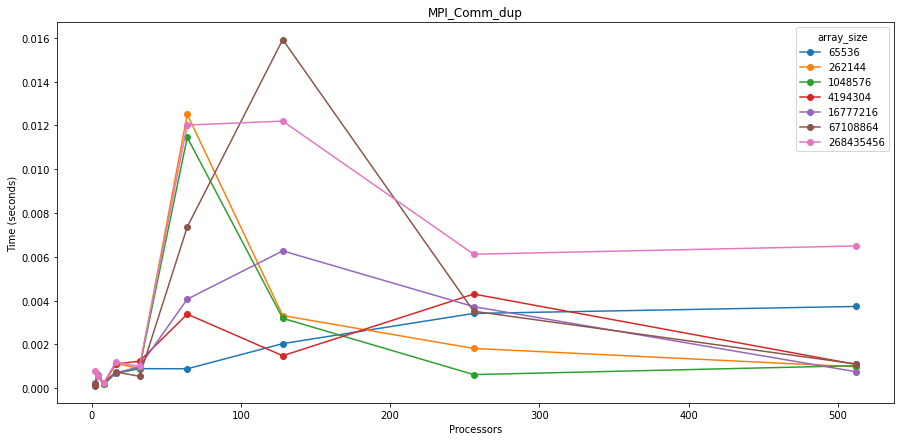

<Figure size 432x288 with 0 Axes>

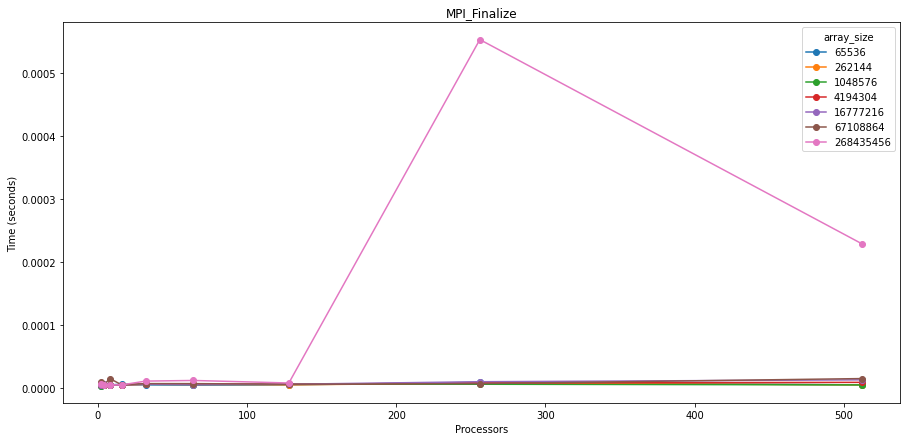

<Figure size 432x288 with 0 Axes>

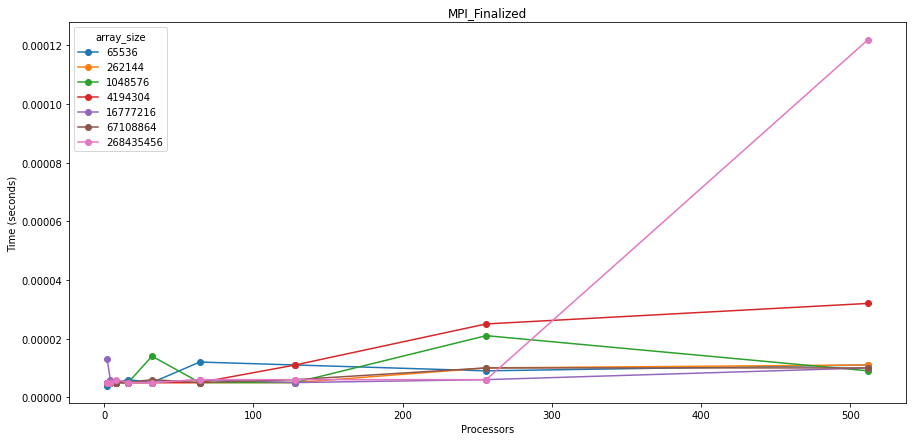

<Figure size 432x288 with 0 Axes>

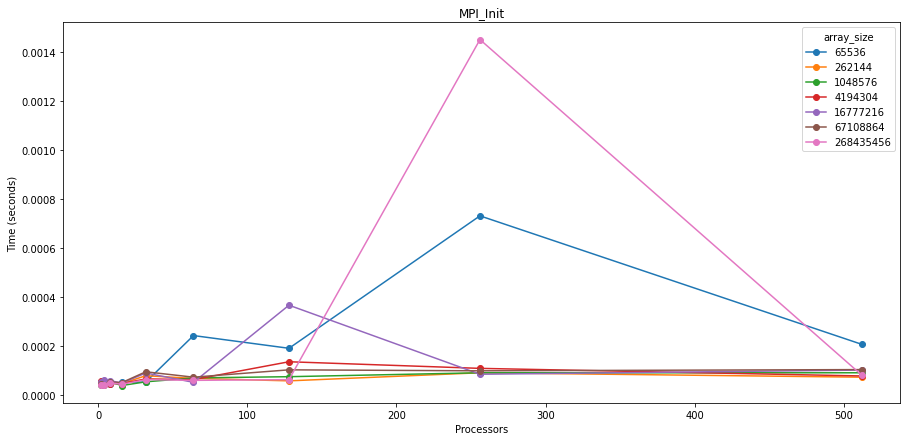

<Figure size 432x288 with 0 Axes>

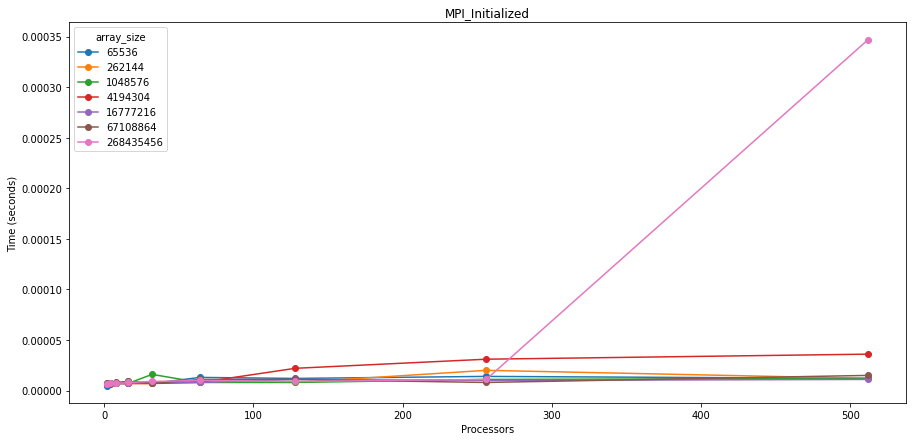

<Figure size 432x288 with 0 Axes>

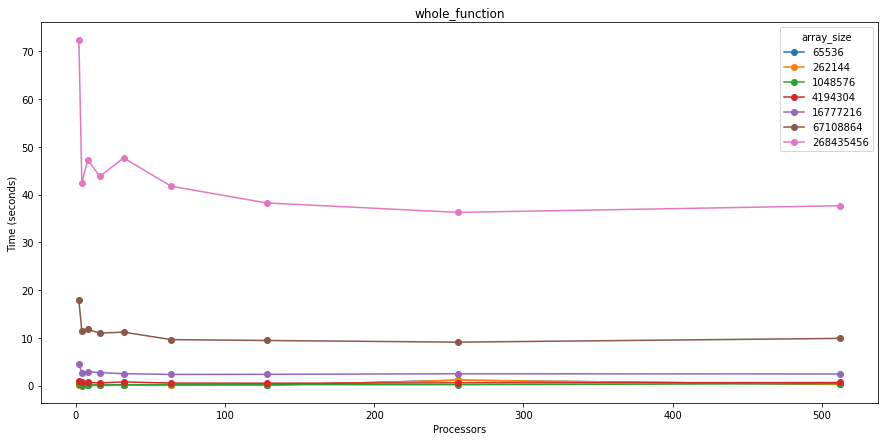

<Figure size 432x288 with 0 Axes>

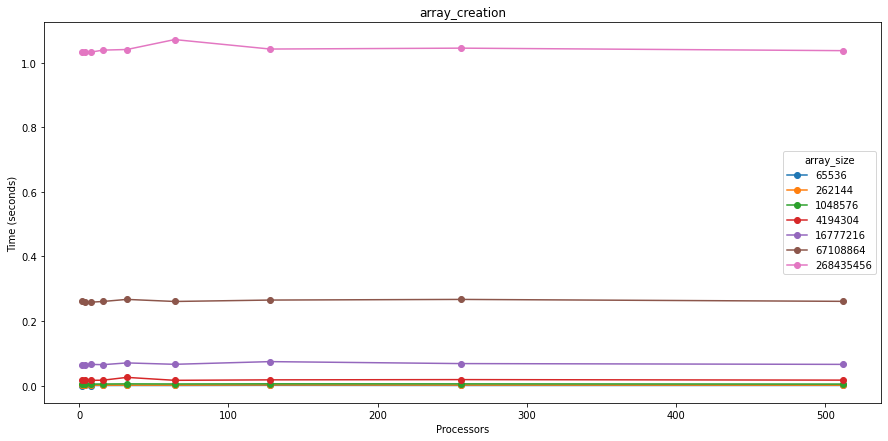

<Figure size 432x288 with 0 Axes>

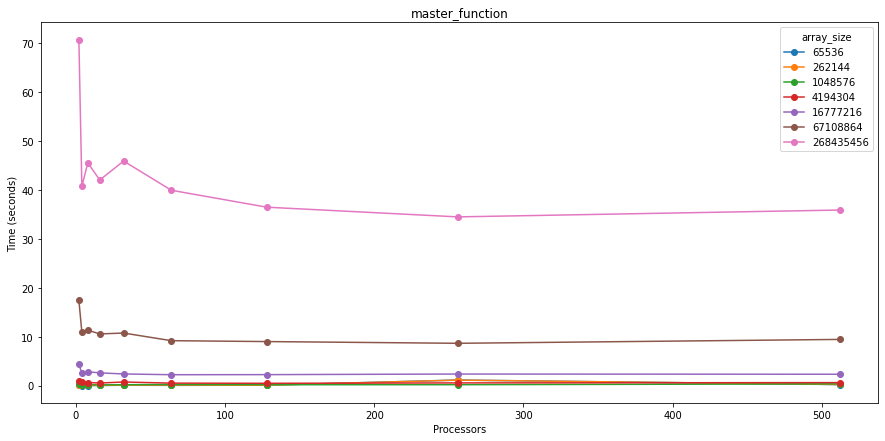

<Figure size 432x288 with 0 Axes>

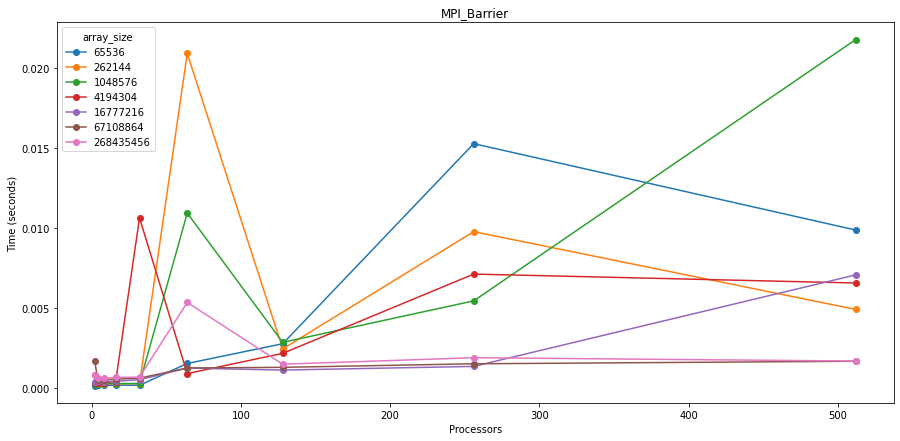

<Figure size 432x288 with 0 Axes>

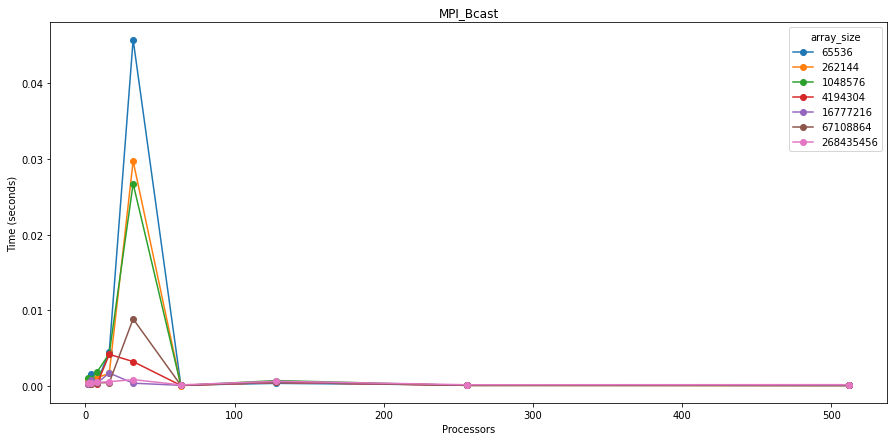

<Figure size 432x288 with 0 Axes>

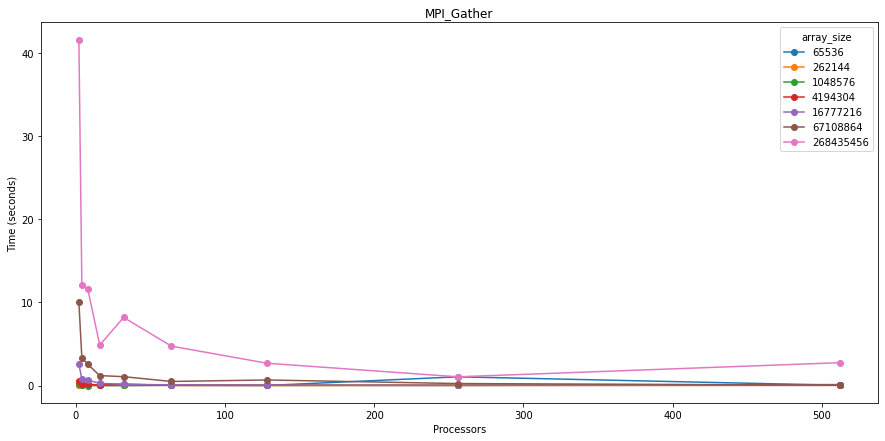

<Figure size 432x288 with 0 Axes>

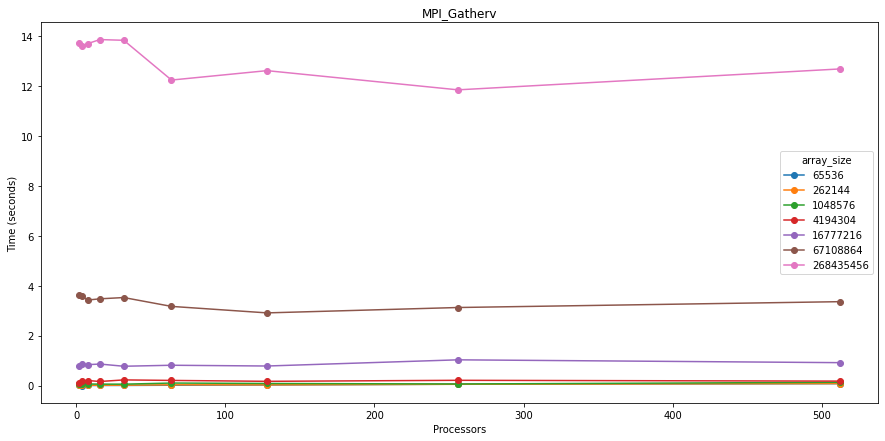

<Figure size 432x288 with 0 Axes>

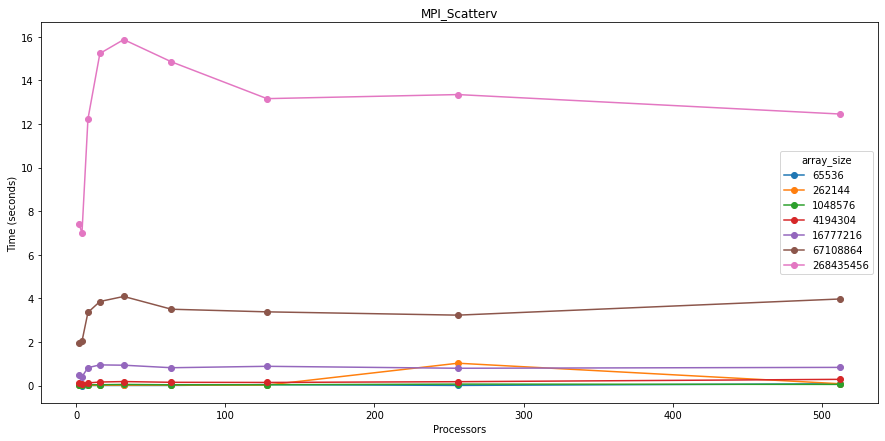

<Figure size 432x288 with 0 Axes>

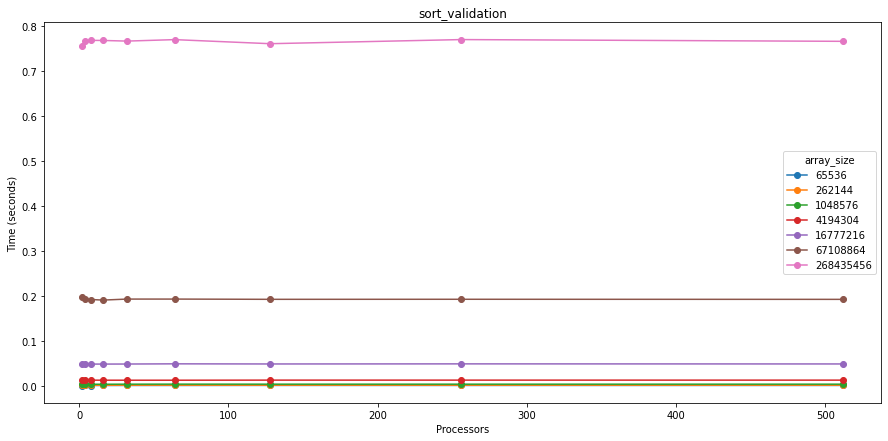

<Figure size 432x288 with 0 Axes>

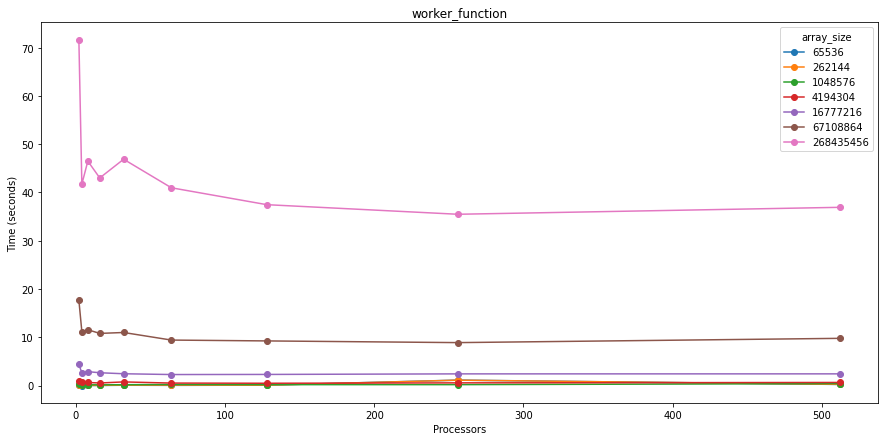

<Figure size 432x288 with 0 Axes>

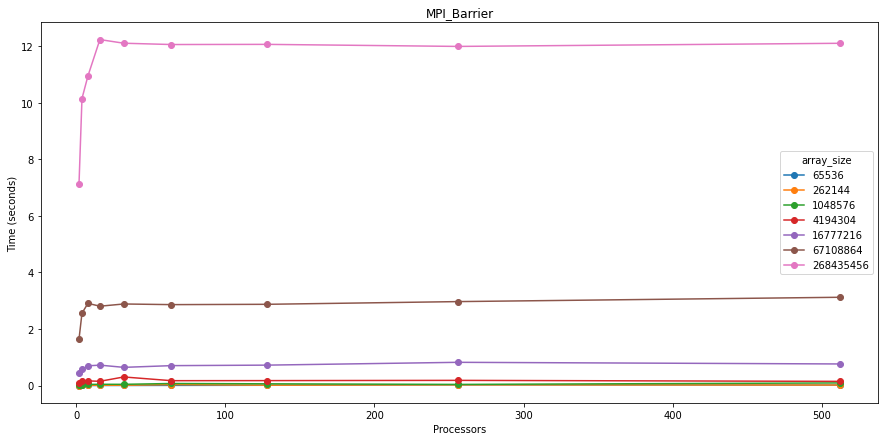

<Figure size 432x288 with 0 Axes>

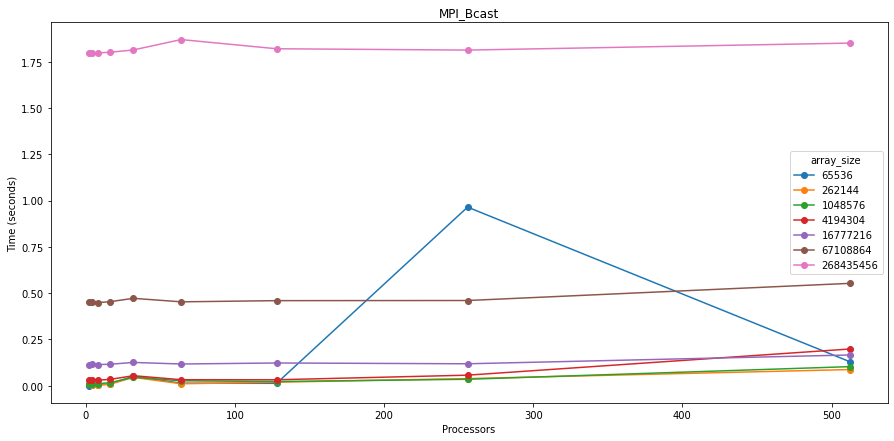

<Figure size 432x288 with 0 Axes>

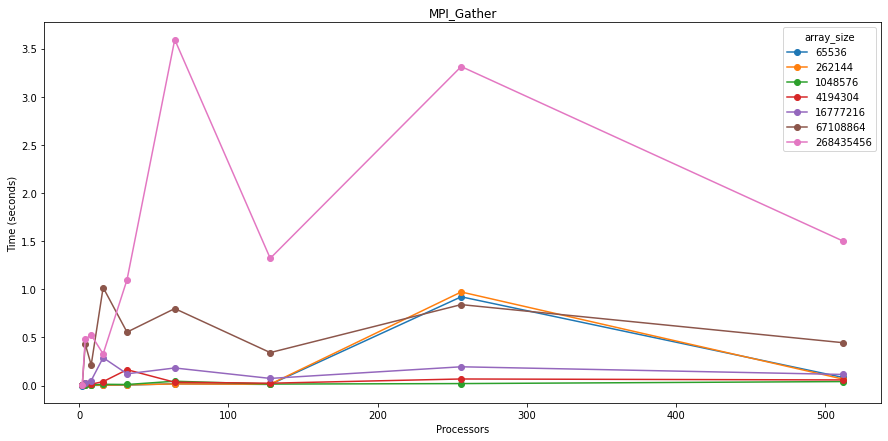

<Figure size 432x288 with 0 Axes>

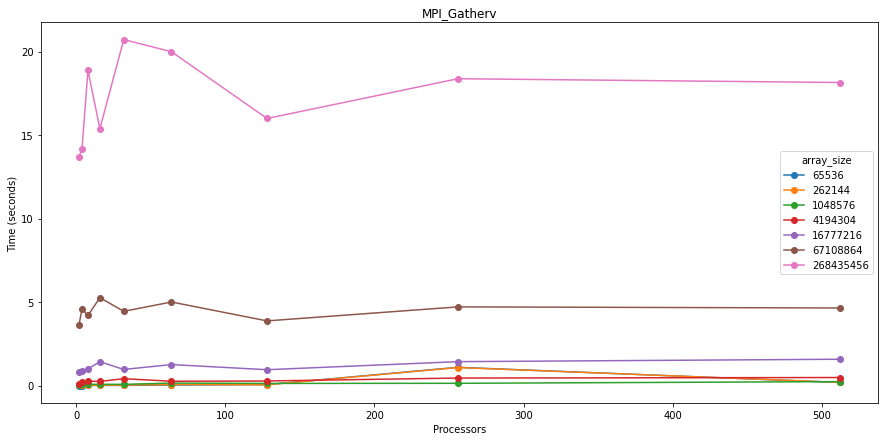

<Figure size 432x288 with 0 Axes>

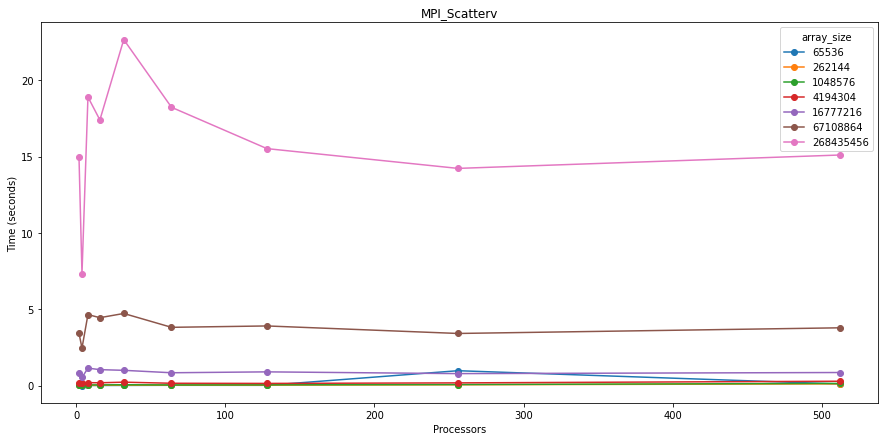

<Figure size 432x288 with 0 Axes>

In [16]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Max time/rank"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
        saved=f"./{trial_name}_trial/{array_type}_array/plot/max/"+node.frame["name"]
    )


Min time graphs

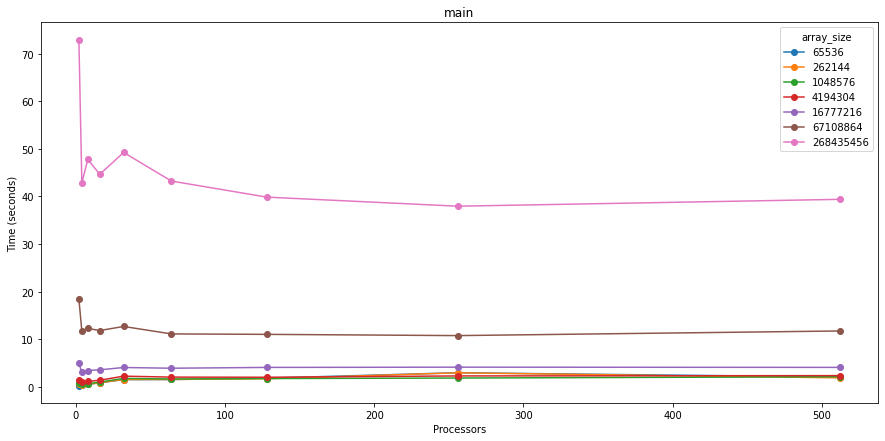

<Figure size 432x288 with 0 Axes>

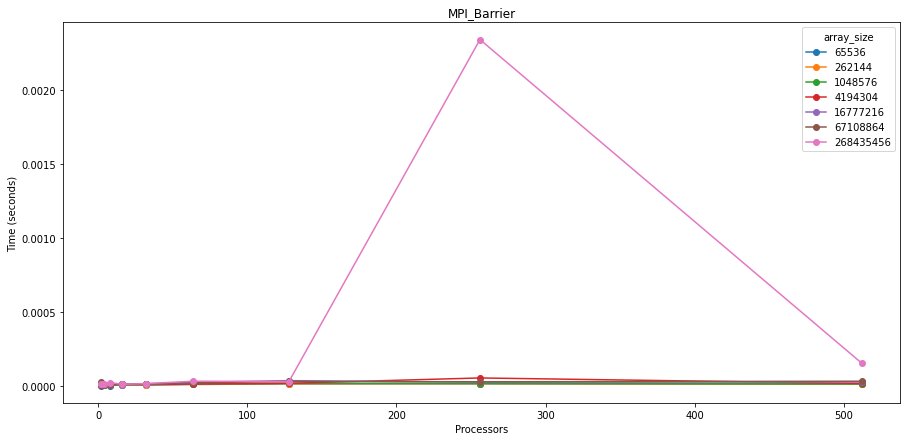

<Figure size 432x288 with 0 Axes>

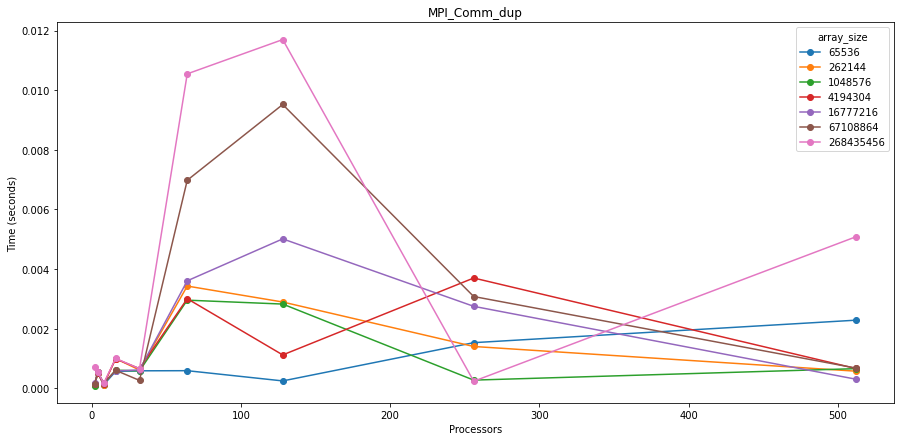

<Figure size 432x288 with 0 Axes>

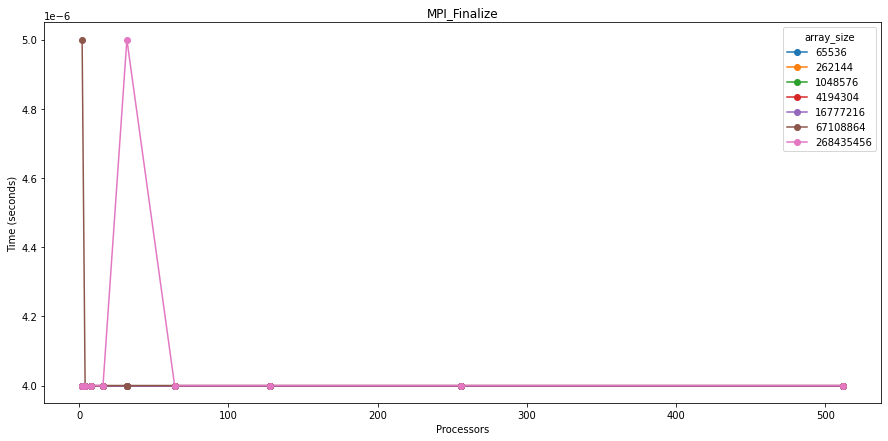

<Figure size 432x288 with 0 Axes>

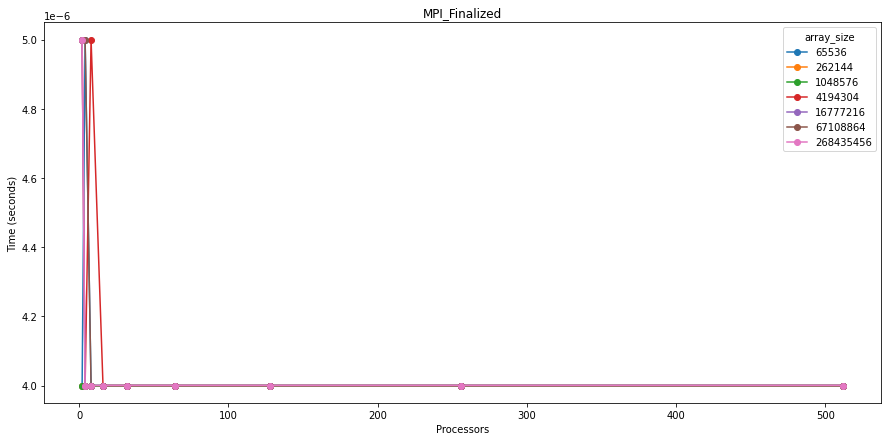

<Figure size 432x288 with 0 Axes>

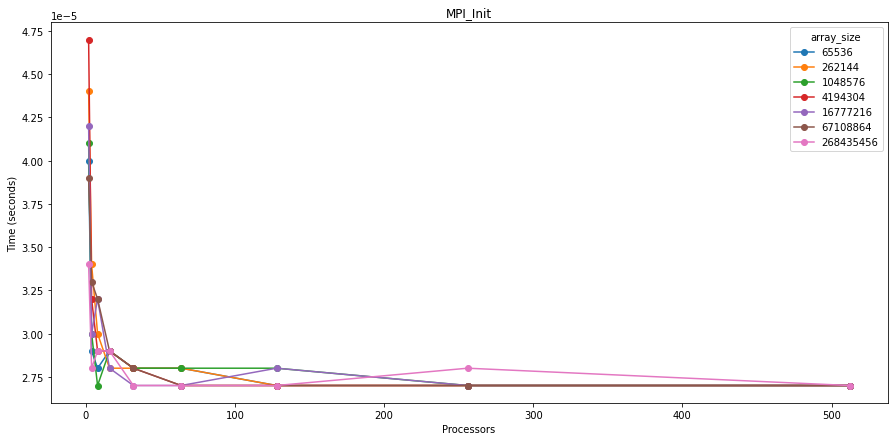

<Figure size 432x288 with 0 Axes>

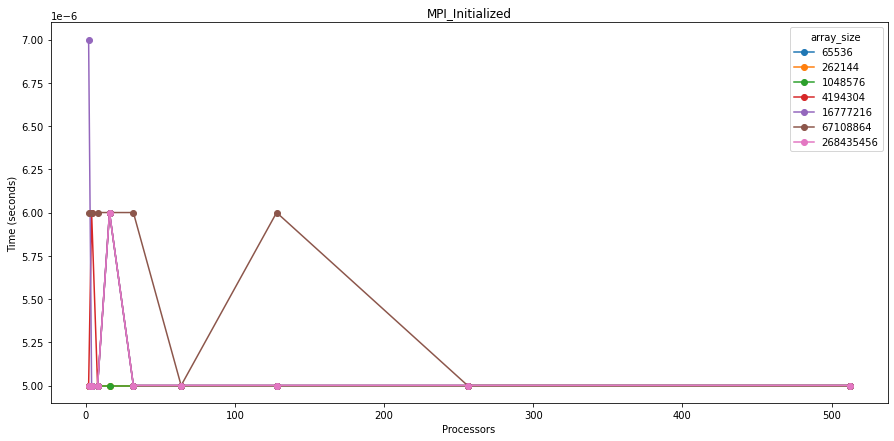

<Figure size 432x288 with 0 Axes>

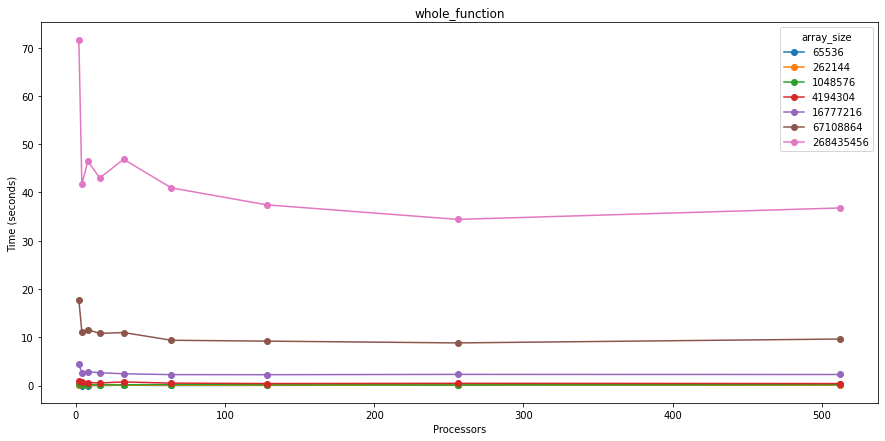

<Figure size 432x288 with 0 Axes>

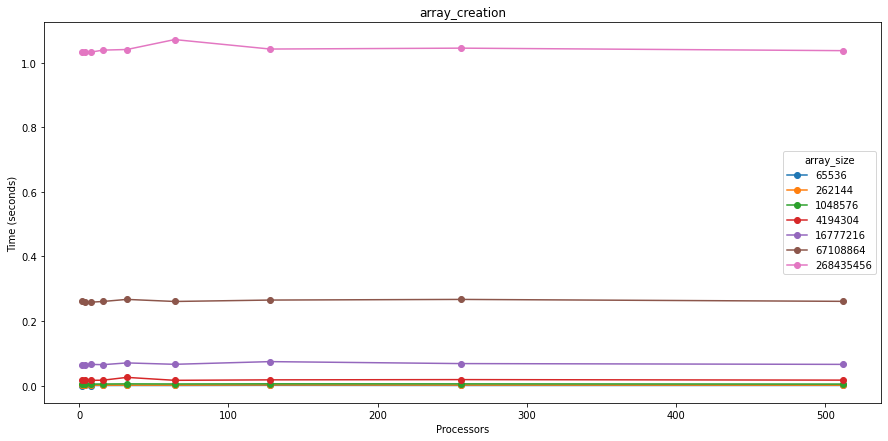

<Figure size 432x288 with 0 Axes>

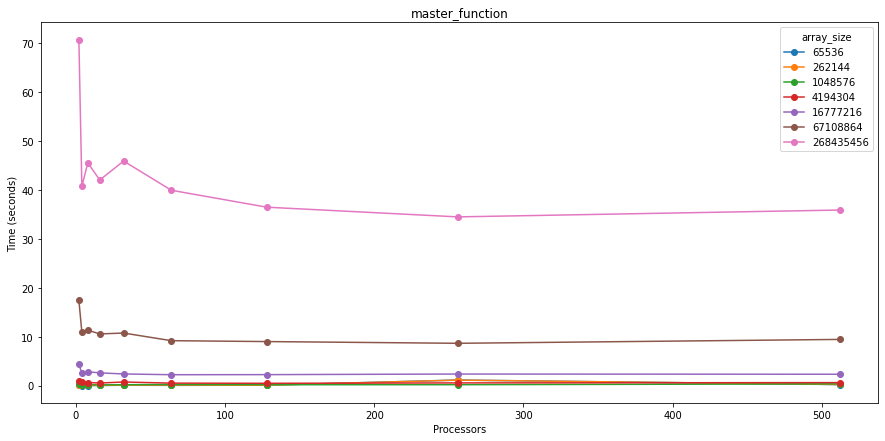

<Figure size 432x288 with 0 Axes>

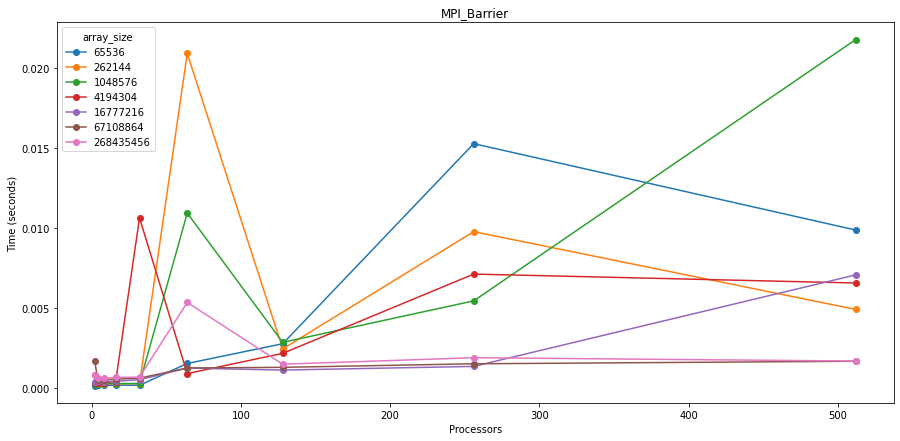

<Figure size 432x288 with 0 Axes>

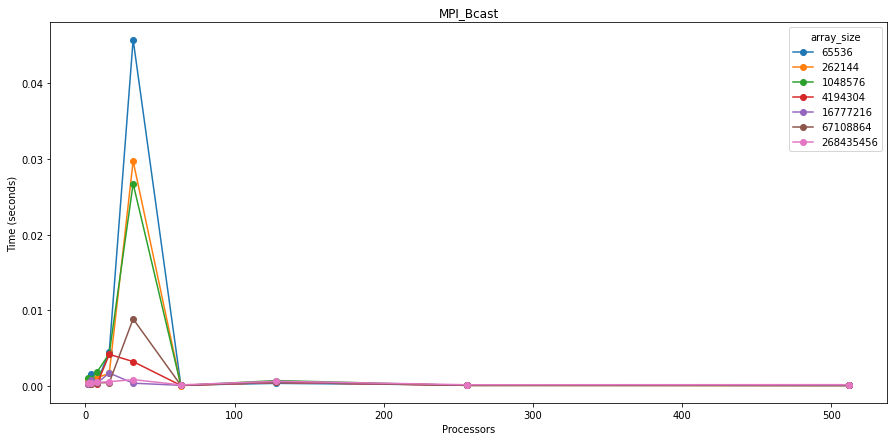

<Figure size 432x288 with 0 Axes>

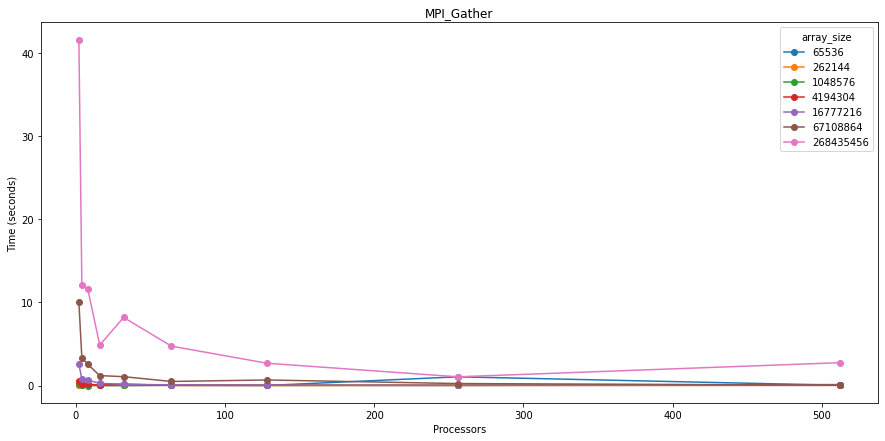

<Figure size 432x288 with 0 Axes>

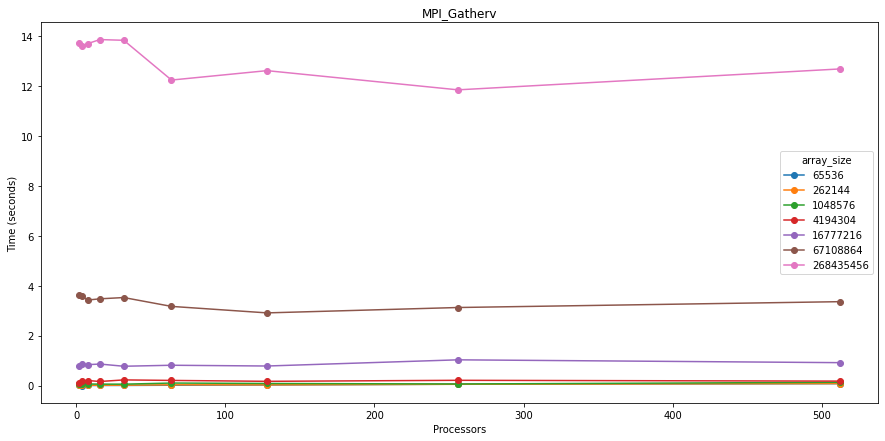

<Figure size 432x288 with 0 Axes>

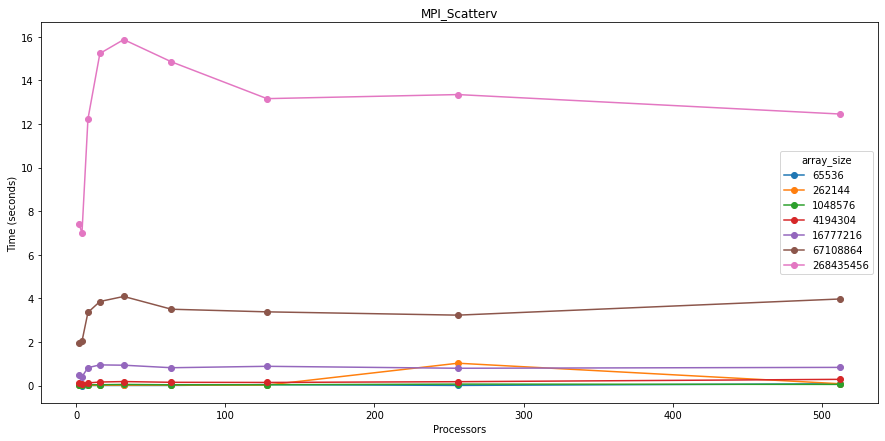

<Figure size 432x288 with 0 Axes>

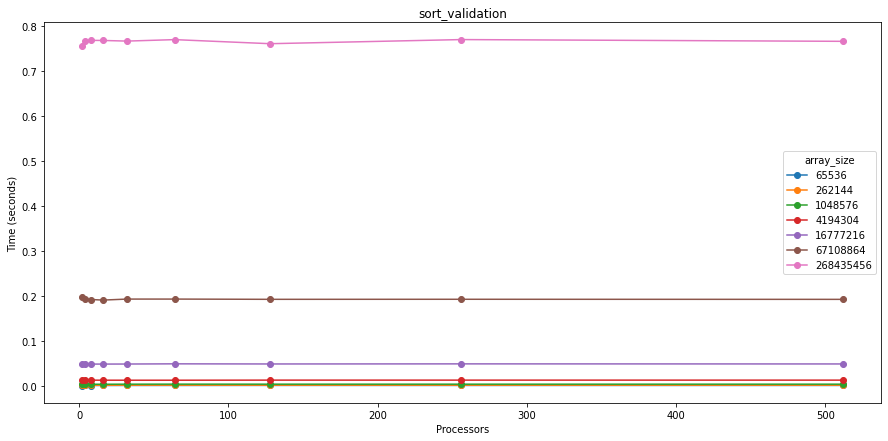

<Figure size 432x288 with 0 Axes>

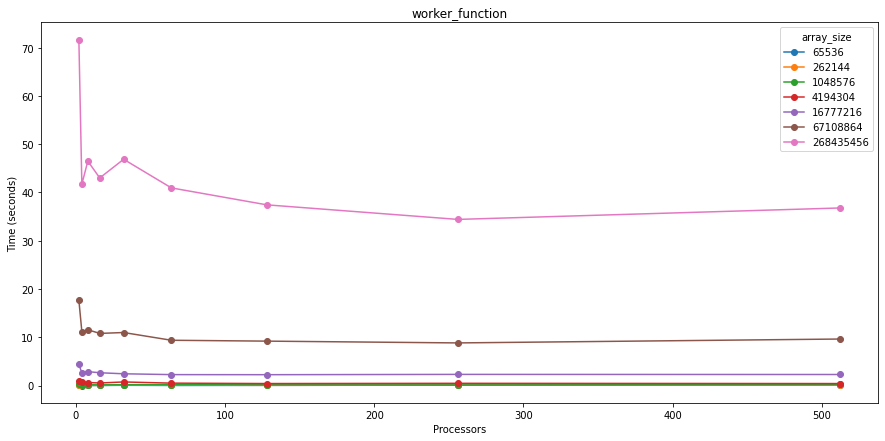

<Figure size 432x288 with 0 Axes>

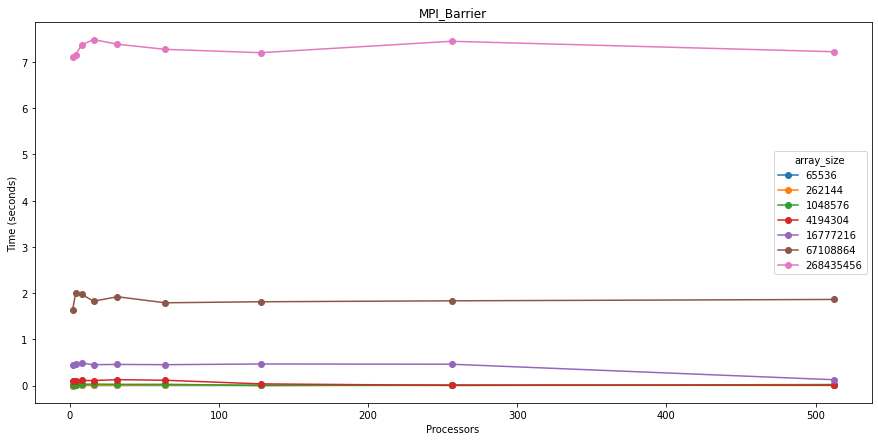

<Figure size 432x288 with 0 Axes>

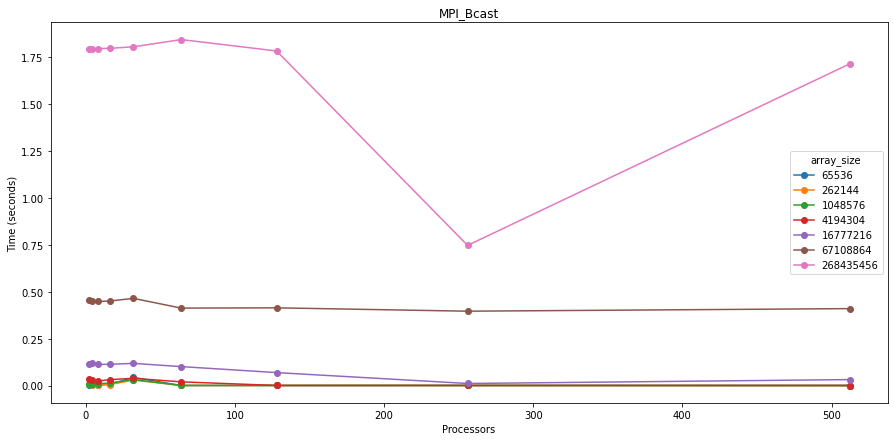

<Figure size 432x288 with 0 Axes>

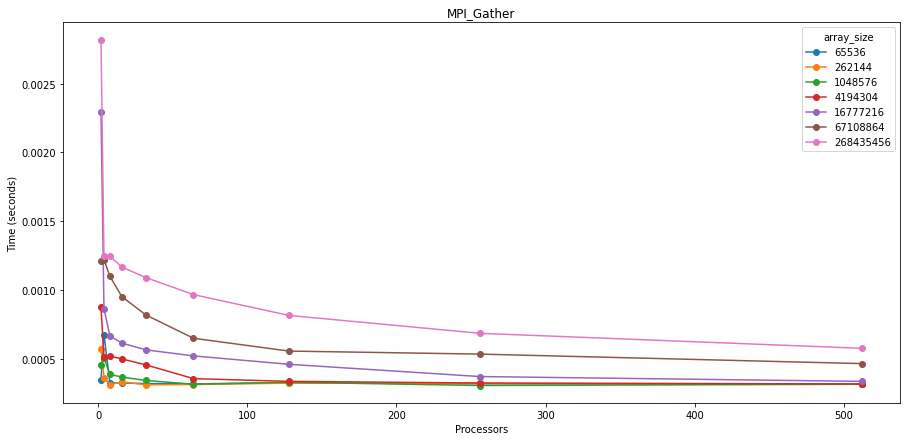

<Figure size 432x288 with 0 Axes>

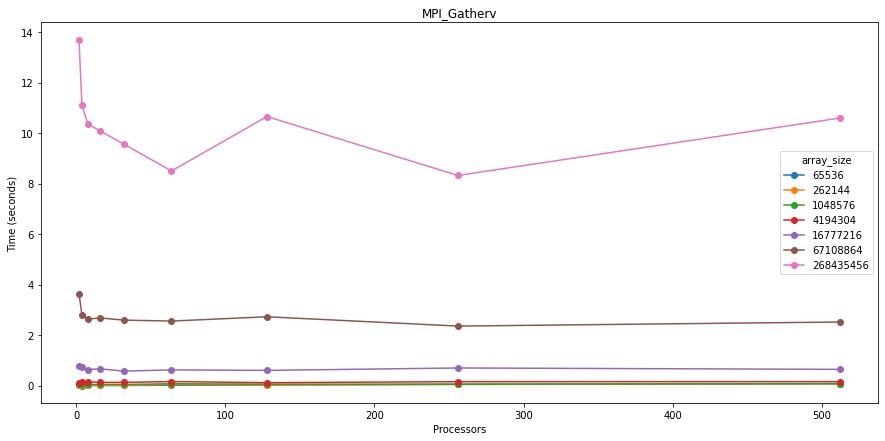

<Figure size 432x288 with 0 Axes>

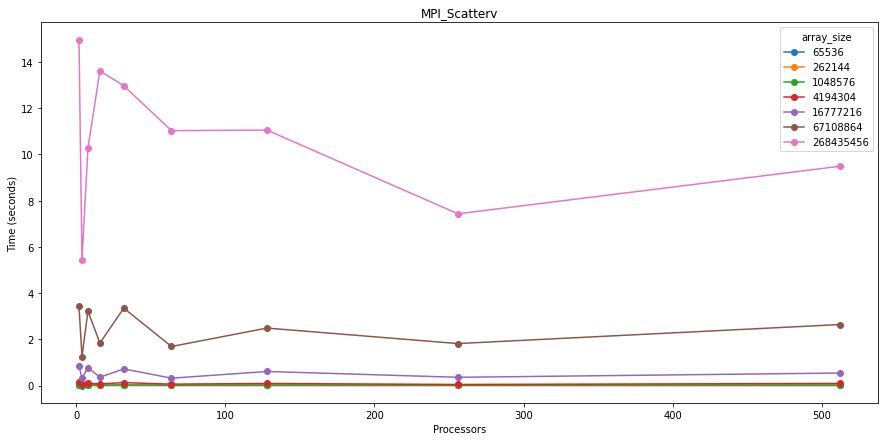

<Figure size 432x288 with 0 Axes>

In [17]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Min time/rank"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
        saved=f"./{trial_name}_trial/{array_type}_array/plot/min/"+node.frame["name"]
    )


Avg time graphs

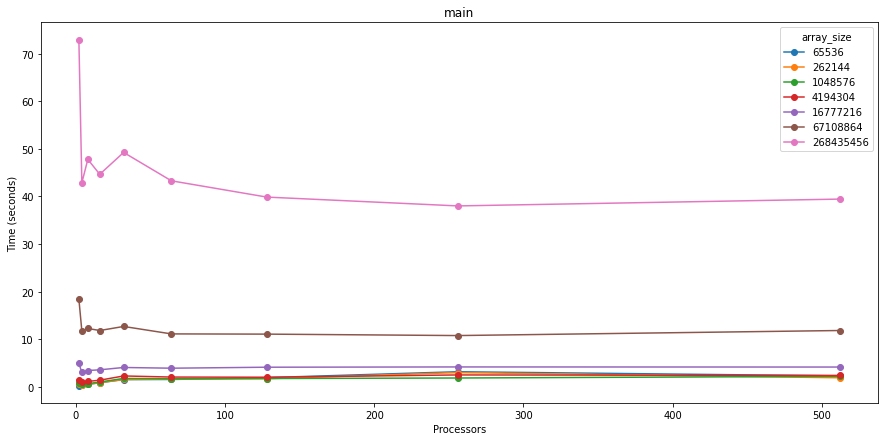

<Figure size 432x288 with 0 Axes>

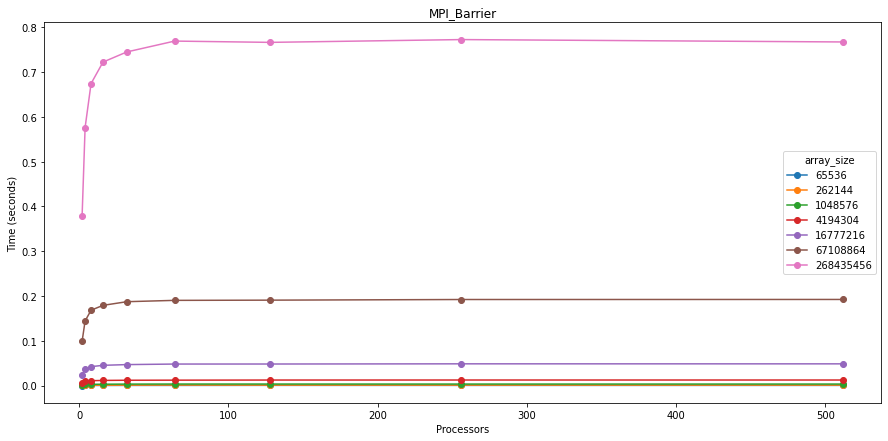

<Figure size 432x288 with 0 Axes>

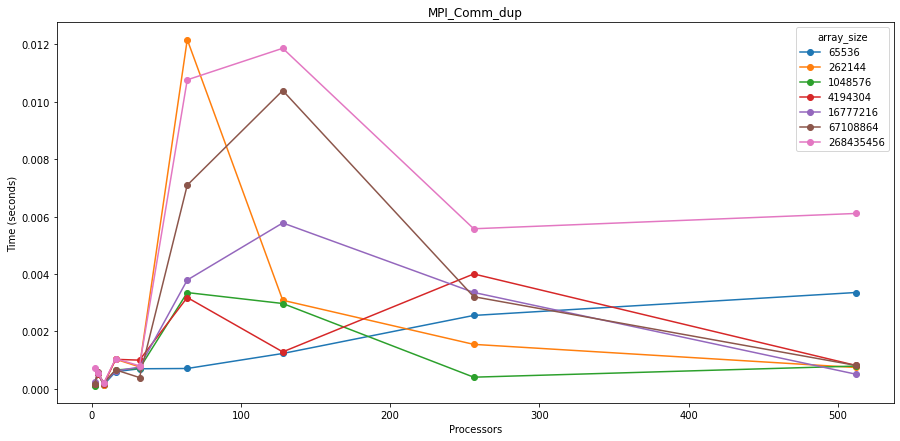

<Figure size 432x288 with 0 Axes>

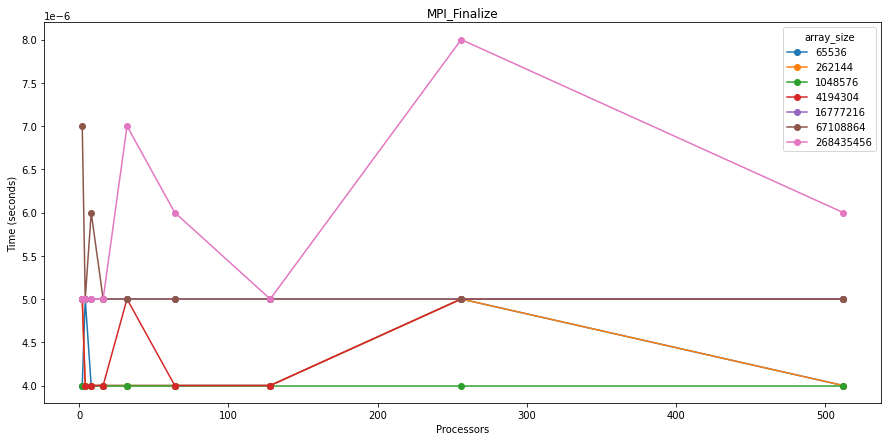

<Figure size 432x288 with 0 Axes>

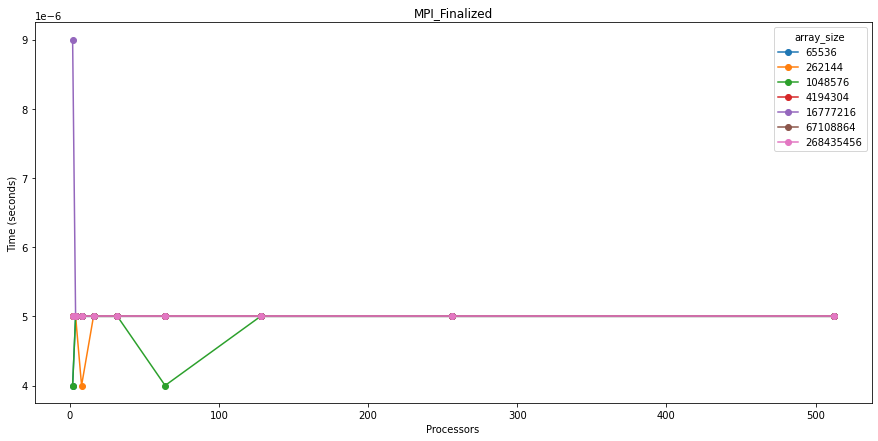

<Figure size 432x288 with 0 Axes>

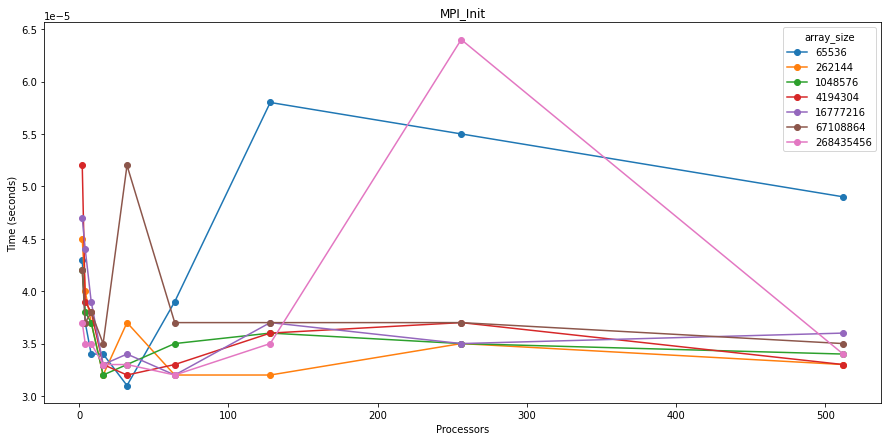

<Figure size 432x288 with 0 Axes>

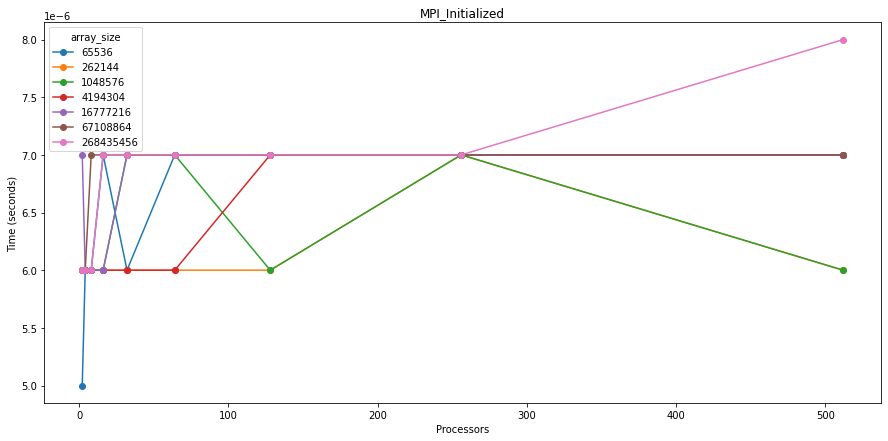

<Figure size 432x288 with 0 Axes>

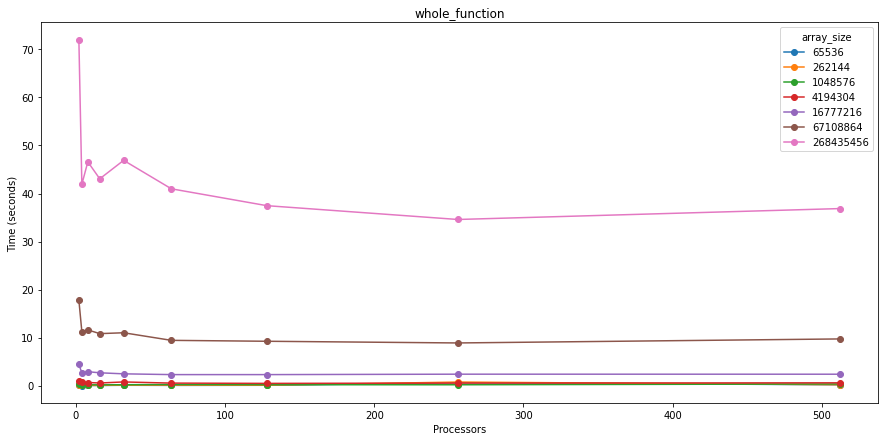

<Figure size 432x288 with 0 Axes>

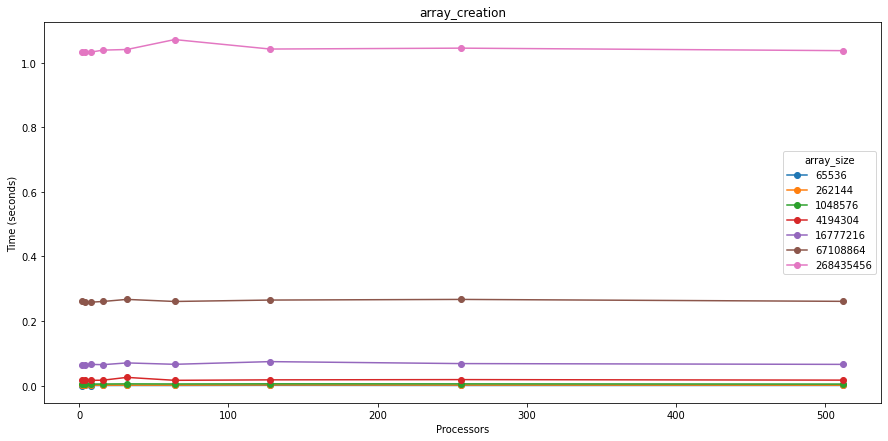

<Figure size 432x288 with 0 Axes>

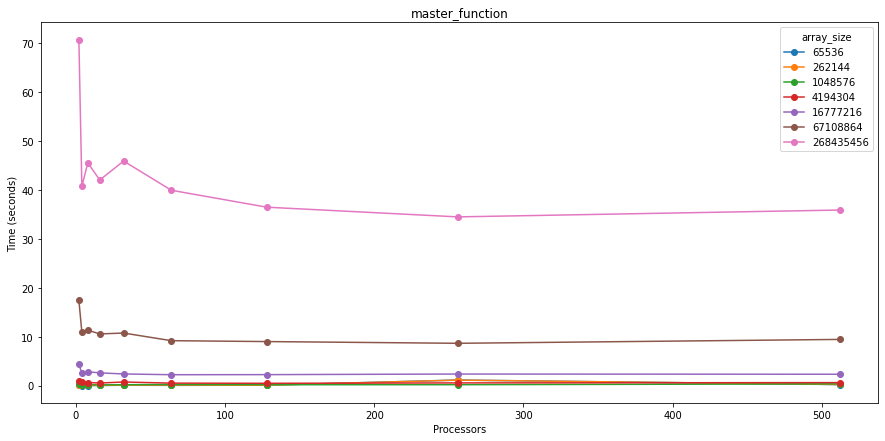

<Figure size 432x288 with 0 Axes>

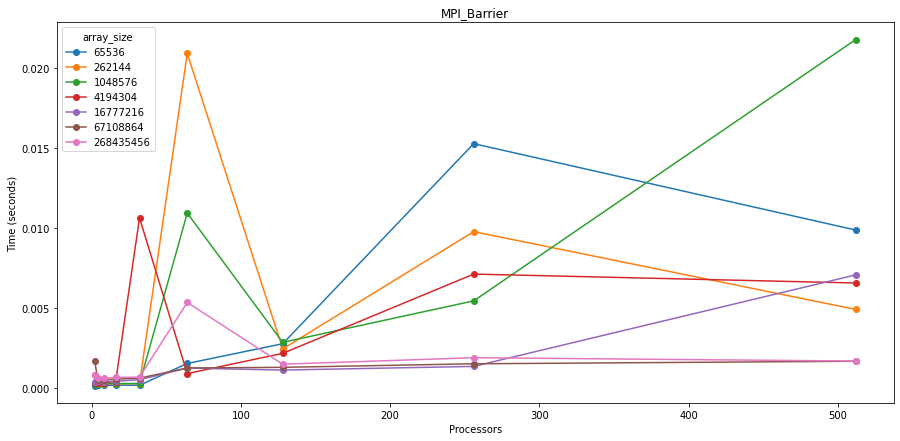

<Figure size 432x288 with 0 Axes>

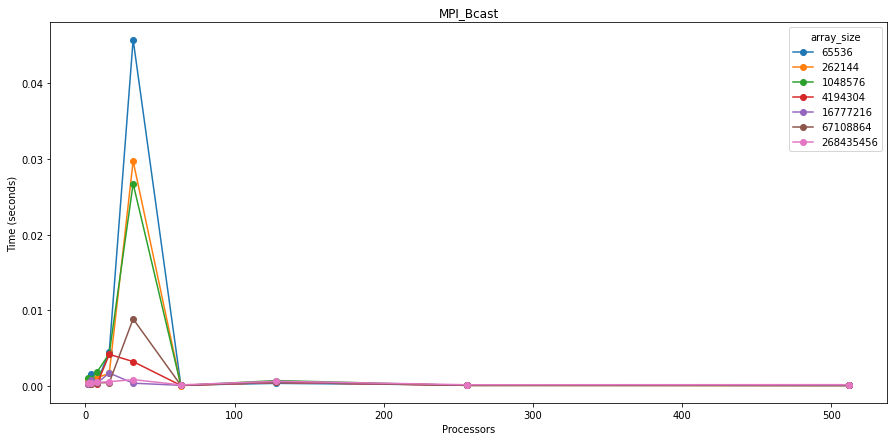

<Figure size 432x288 with 0 Axes>

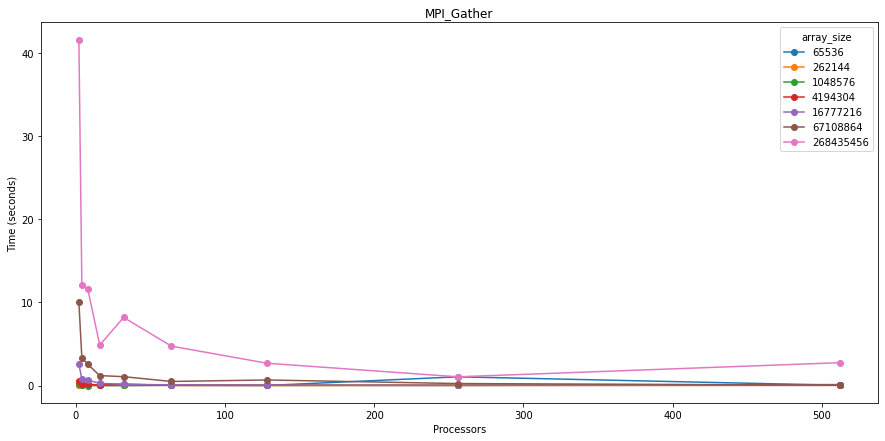

<Figure size 432x288 with 0 Axes>

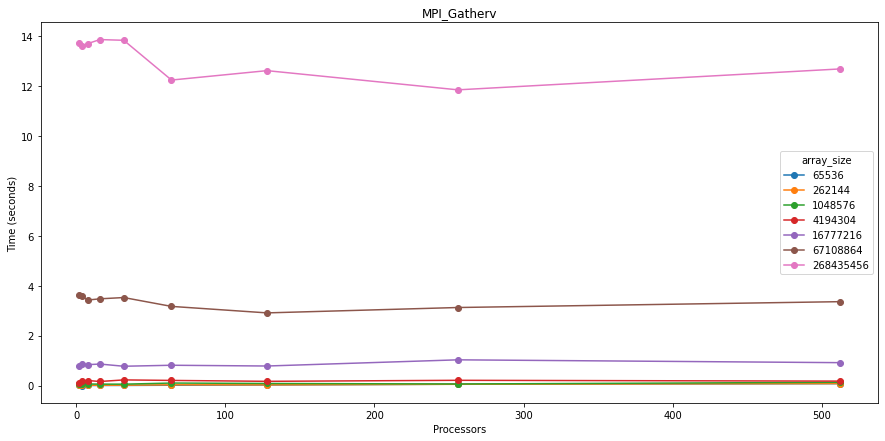

<Figure size 432x288 with 0 Axes>

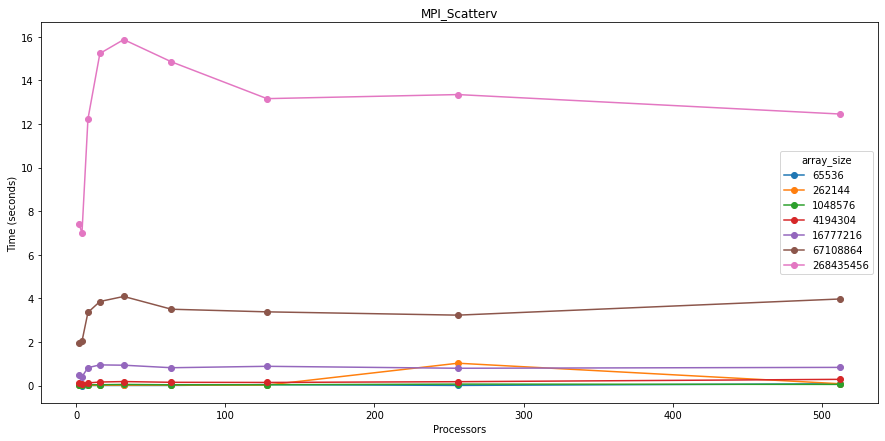

<Figure size 432x288 with 0 Axes>

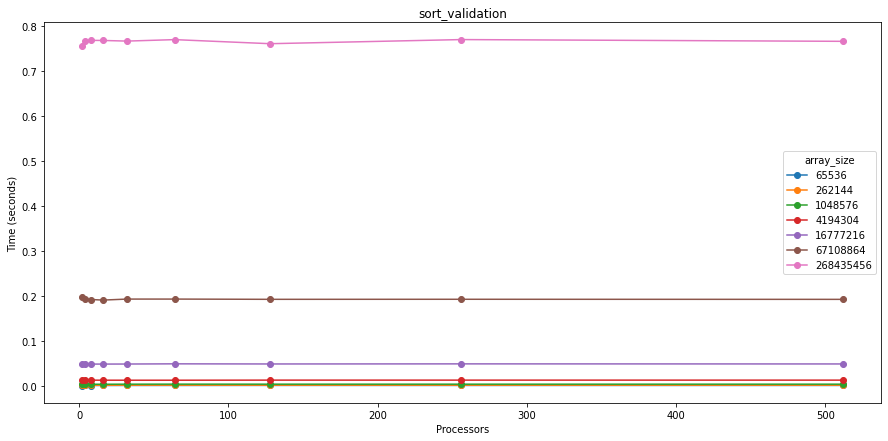

<Figure size 432x288 with 0 Axes>

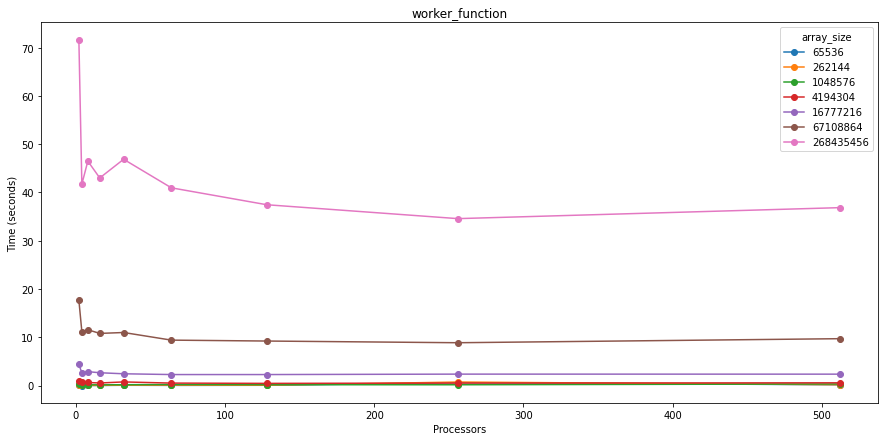

<Figure size 432x288 with 0 Axes>

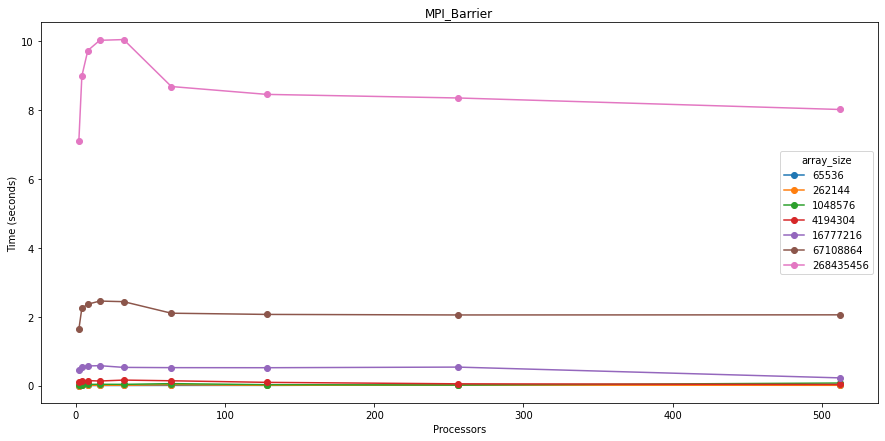

<Figure size 432x288 with 0 Axes>

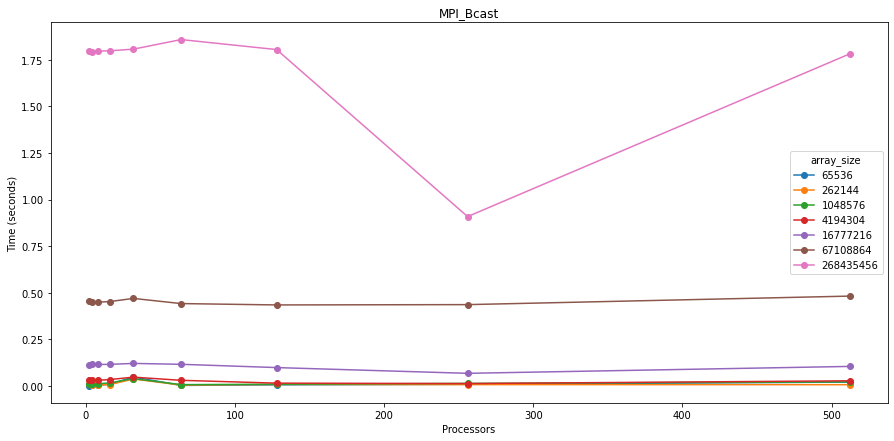

<Figure size 432x288 with 0 Axes>

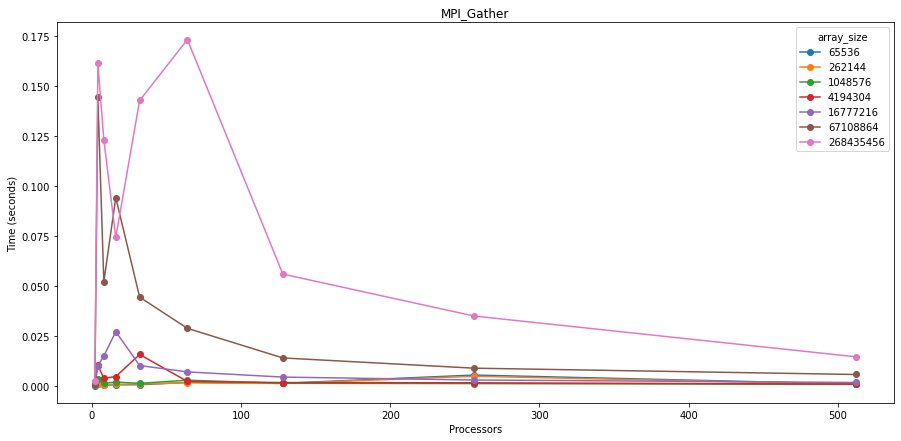

<Figure size 432x288 with 0 Axes>

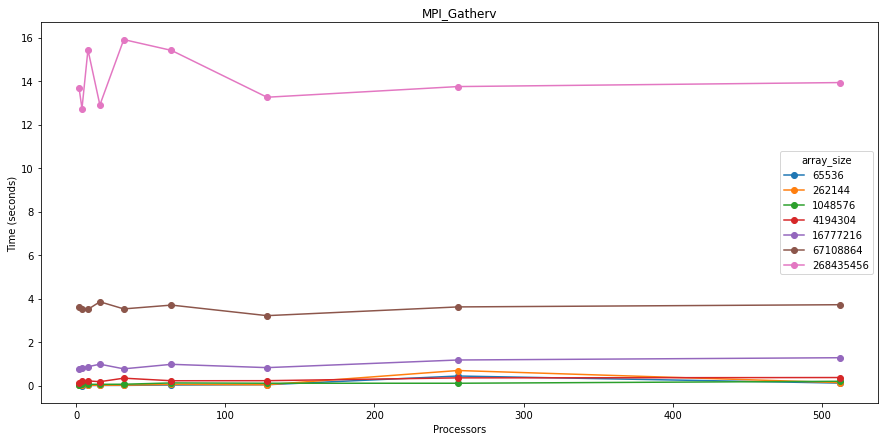

<Figure size 432x288 with 0 Axes>

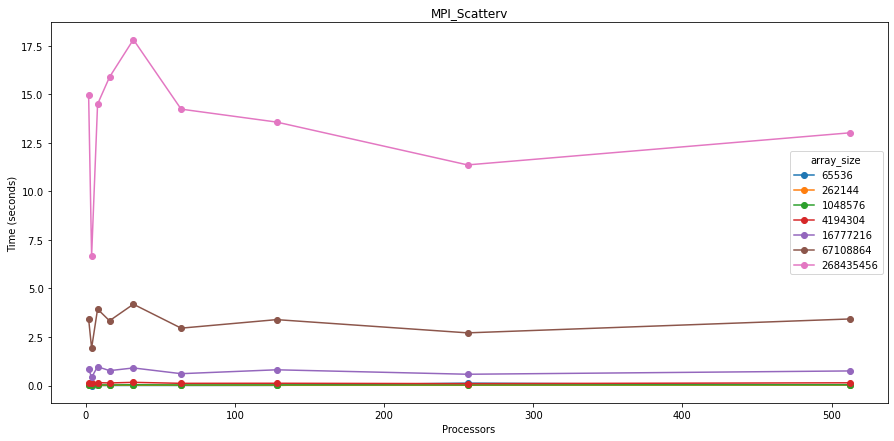

<Figure size 432x288 with 0 Axes>

In [18]:
for node in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[node, "Avg time/rank"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Processors",
        ylabel="Time (seconds)",
        saved=f"./{trial_name}_trial/{array_type}_array/plot/avg/"+node.frame["name"]
    )
    plt.savefig()